# Optimization via Gradient Descent

In [21]:
import numpy as np

# implement the Gradient Descent algorithm
def gradient_descent(f, grad_f, x0, step_size, kmax, tolf, tolx):
    x = [x0]
    xk = x0
    f_val = []
    grads = []
    err = []
    err_x0 = np.linalg.norm(grad_f(x0), 2)
    k = 0
    while k < kmax:
        grad_f_xk = grad_f(xk)
        f_xk = f(xk)
        err_xk = np.linalg.norm(grad_f_xk, 2)

        if err_xk < tolf * err_x0 or (len(x) > 2 and np.linalg.norm(x[-1] - x[-2], 2) < tolx * err_x0):
            break

        pk = - grad_f_xk
        ak = step_size
        xk = xk + ak * pk
        x.append(xk)
        f_val.append(f_xk)
        grads.append(grad_f_xk)
        err.append(err_xk)
        k += 1

    return (x, k, f_val, grads, err)

In [22]:
def backtrack(f, grad_f, x):
    ak = 1
    c = 0.8
    tau = 0.25

    while f(x - ak * grad_f(x)) > f(x) - c * ak * np.linalg.norm(grad_f(x), 2) ** 2:
        ak = tau * ak
        if ak < 1e-3:
            break
    
    return ak

# implement the Gradient Descent algorithm
def gradient_descent_with_backtracking(f, grad_f, x0, kmax, tolf, tolx):
    x = [x0]
    xk = x0
    f_val = []
    grads = []
    err = []
    err_x0 = np.linalg.norm(grad_f(x0), 2)
    k = 0
    while k < kmax:
        grad_f_xk = grad_f(xk)
        f_xk = f(xk)
        err_xk = np.linalg.norm(grad_f_xk, 2)

        if err_xk < tolf * err_x0 or (len(x) > 2 and np.linalg.norm(x[-1] - x[-2], 2) < tolx * err_x0):
            break

        pk = - grad_f_xk
        ak = backtrack(f, grad_f, xk)
        xk = xk + ak * pk
        x.append(xk)
        f_val.append(f_xk)
        grads.append(grad_f_xk)
        err.append(err_xk)
        k += 1

    return (x, k, f_val, grads, err)

In [23]:
import matplotlib.pyplot as plt

# test the algorithm

f1 = lambda x: (x[0] - 3) ** 2 + (x[1] - 1) ** 2
grad_f1 = lambda x: np.array([2 * (x[0] - 3), 2 * (x[1] - 1)])
# x* = (3, 1).T

f2 = lambda x: 10 * (x[0] - 1) ** 2 + (x[1] - 2) ** 2
grad_f2 = lambda x: np.array([20 * (x[0] - 1), 2 * (x[1] - 2)])
# x* = (1, 2).T

fv_n = 10
def fv(n, lam):
    v = np.linspace(0, 1, n)
    A = np.vander(v, increasing=True)
    x_true = np.ones(n)
    b = A @ x_true
    f = lambda x: 0.5 * np.linalg.norm(A @ x.T - b, 2) ** 2 + (lam / 2) * np.linalg.norm(x, 2) ** 2
    grad_f = lambda x: (A @ x.T - b) @ A.T + lam * x
    return (f, grad_f)

f3, grad_f3 = fv(fv_n, 0)

f4, grad_f4 = fv(fv_n, 0.6)

f5 = lambda x: x**4 + x**3 - 2 * x**2 - 2*x
grad_f5 = lambda x: 4 * x**3 + 3 * x**2 - 4 * x - 2


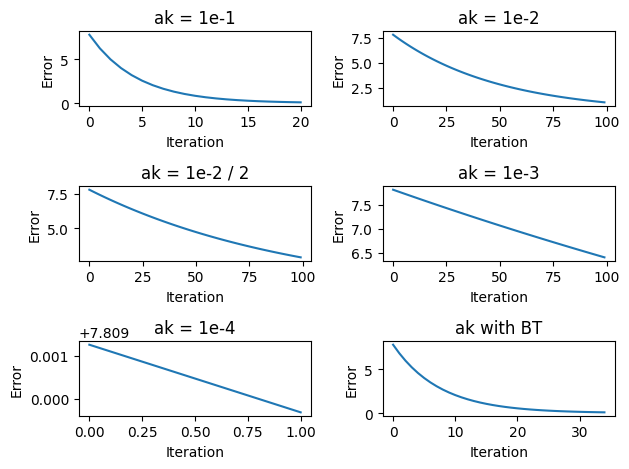

In [24]:
x1_start = np.array([0, -1.5])
x1_1, k1_1, f_val1_1, grads1_1, err1_1 = gradient_descent(f1, grad_f1, x1_start, 1e-1, 100, 1e-2, 1e-4)
x1_2, k1_2, f_val1_2, grads1_2, err1_2 = gradient_descent(f1, grad_f1, x1_start, 1e-2, 100, 1e-2, 1e-4)
x1_3, k1_3, f_val1_3, grads1_3, err1_3 = gradient_descent(f1, grad_f1, x1_start, 1e-2 / 2, 100, 1e-2, 1e-4)
x1_4, k1_4, f_val1_4, grads1_4, err1_4 = gradient_descent(f1, grad_f1, x1_start, 1e-3, 100, 1e-2, 1e-4)
x1_5, k1_5, f_val1_5, grads1_5, err1_5 = gradient_descent(f1, grad_f1, x1_start, 1e-4, 100, 1e-2, 1e-4)
x1_bt, k1_bt, f_val1_bt, grads1_bt, err1_bt = gradient_descent_with_backtracking(f1, grad_f1, x1_start, 100, 1e-2, 1e-4)

# plot the errors
plt.subplot(3, 2, 1)
plt.plot(err1_1)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak = 1e-1')

plt.subplot(3, 2, 2)
plt.plot(err1_2)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak = 1e-2')

plt.subplot(3, 2, 3)
plt.plot(err1_3)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak = 1e-2 / 2')

plt.subplot(3, 2, 4)
plt.plot(err1_4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak = 1e-3')

plt.subplot(3, 2, 5)
plt.plot(err1_5)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak = 1e-4')

plt.subplot(3, 2, 6)
plt.plot(err1_bt)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak with BT')

plt.tight_layout()
plt.show()

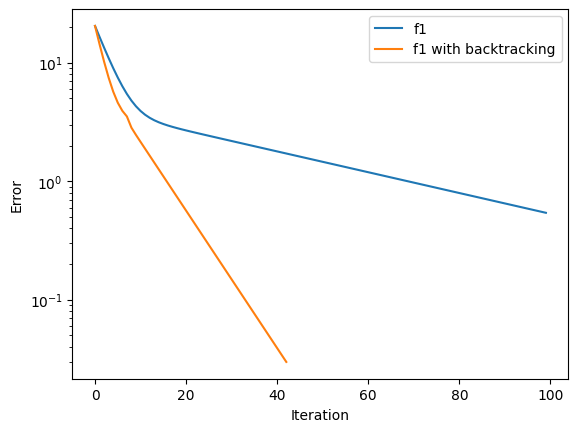

In [25]:
x2_start = np.array([0, 0])
x2, k2, f_val2, grads2, err2 = gradient_descent(f2, grad_f2, x2_start, 1e-2, 100, 1e-6, 1e-4)
x2_bt, k2_bt, f_val2_bt, grads2_bt, err2_bt = gradient_descent_with_backtracking(f2, grad_f2, x2_start, 100, 1e-6, 1e-4)

# plot the errors
plt.plot(err2, label='f1')
plt.plot(err2_bt, label='f1 with backtracking')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.yscale('log')
plt.legend()
plt.show()

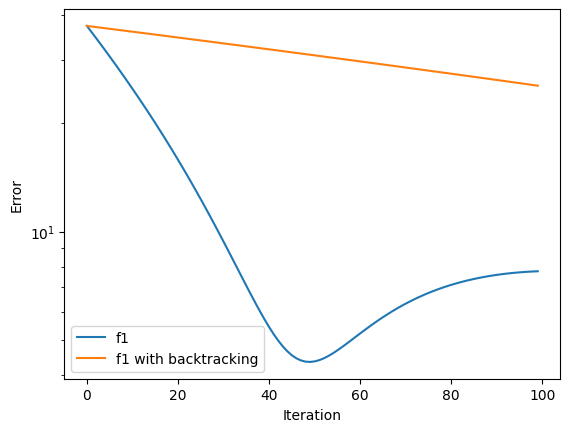

In [26]:
x3, k3, f_val3, grads3, err3 = gradient_descent(f3, grad_f3, np.zeros((fv_n)), 1e-2, 100, 1e-8, 1e-6)
x3_bt, k3_bt, f_val3_bt, grads3_bt, err3_bt = gradient_descent_with_backtracking(f3, grad_f3, np.zeros((fv_n)), 100, 1e-8, 1e-6)

# plot the errors
plt.plot(err3, label='f1')
plt.plot(err3_bt, label='f1 with backtracking')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.yscale('log')
plt.legend()
plt.show()

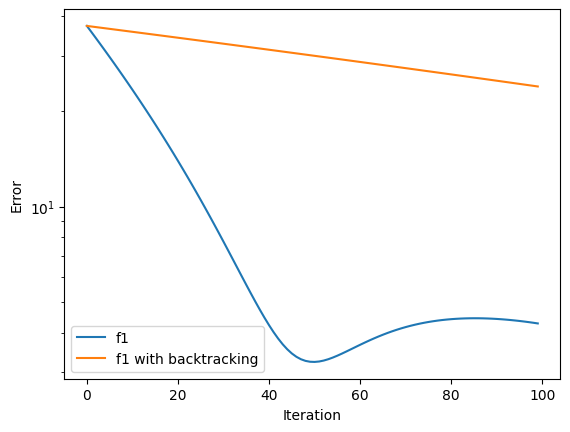

In [27]:
x4, k4, f_val4, grads4, err4 = gradient_descent(f4, grad_f4, np.zeros((fv_n)), 1e-2, 100, 1e-8, 1e-6)
x4_bt, k4_bt, f_val4_bt, grads4_bt, err4_bt = gradient_descent_with_backtracking(f4, grad_f4, np.zeros((fv_n)), 100, 1e-8, 1e-6)

# plot the errors
plt.plot(err4, label='f1')
plt.plot(err4_bt, label='f1 with backtracking')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.yscale('log')
plt.legend()
plt.show()

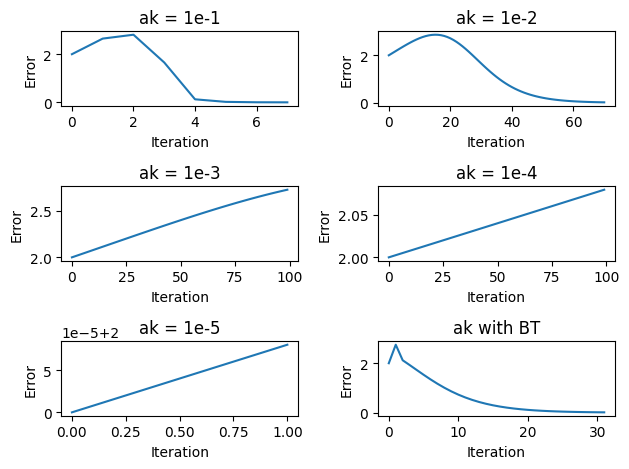

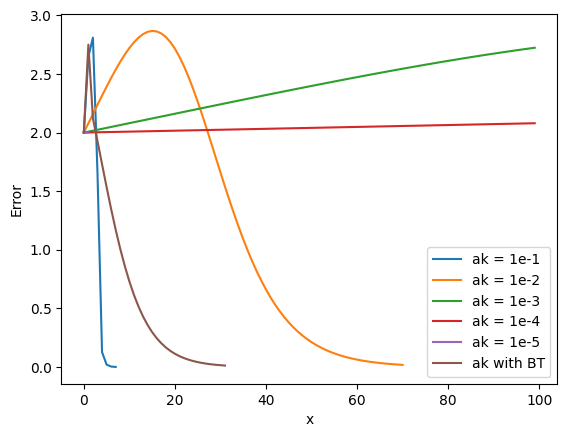

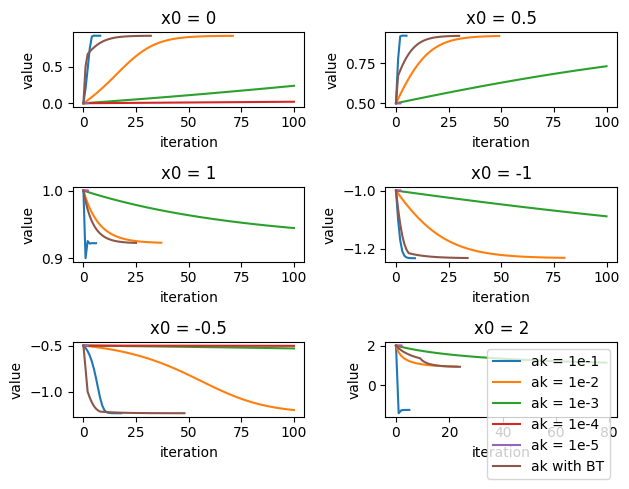

In [28]:
x5_1, k5_1, f_val5_1, grads5_1, err5_1 = gradient_descent(f5, grad_f5, np.array([0]), 1e-1, 100, 1e-4, 1e-4)
x5_2, k5_2, f_val5_2, grads5_2, err5_2 = gradient_descent(f5, grad_f5, np.array([0]), 1e-2, 100, 1e-4, 1e-4)
x5_3, k5_3, f_val5_3, grads5_3, err5_3 = gradient_descent(f5, grad_f5, np.array([0]), 1e-3, 100, 1e-4, 1e-4)
x5_4, k5_4, f_val5_4, grads5_4, err5_4 = gradient_descent(f5, grad_f5, np.array([0]), 1e-4, 100, 1e-4, 1e-4)
x5_5, k5_5, f_val5_5, grads5_5, err5_5 = gradient_descent(f5, grad_f5, np.array([0]), 1e-5, 100, 1e-4, 1e-4)
x5_bt, k5_bt, f_val5_bt, grads5_bt, err5_bt = gradient_descent_with_backtracking(f5, grad_f5, np.array([0]), 1e6, 1e-4, 1e-4)

# plot the errors
plt.subplot(3, 2, 1)
plt.plot(err5_1)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak = 1e-1')

plt.subplot(3, 2, 2)
plt.plot(err5_2)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak = 1e-2')

plt.subplot(3, 2, 3)
plt.plot(err5_3)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak = 1e-3')

plt.subplot(3, 2, 4)
plt.plot(err5_4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak = 1e-4')

plt.subplot(3, 2, 5)
plt.plot(err5_5)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak = 1e-5')

plt.subplot(3, 2, 6)
plt.plot(err5_bt)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('ak with BT')

plt.tight_layout()
plt.show()


plt.plot(err5_1, label='ak = 1e-1')
plt.plot(err5_2, label='ak = 1e-2')
plt.plot(err5_3, label='ak = 1e-3')
plt.plot(err5_4, label='ak = 1e-4')
plt.plot(err5_5, label='ak = 1e-5')
plt.plot(err5_bt, label='ak with BT')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.show()

plt.subplot(3, 2, 1)
plt.title('x0 = 0')
plt.plot(x5_1, label='ak = 1e-1')
plt.plot(x5_2, label='ak = 1e-2')
plt.plot(x5_3, label='ak = 1e-3')
plt.plot(x5_4, label='ak = 1e-4')
plt.plot(x5_5, label='ak = 1e-5')
plt.plot(x5_bt, label='ak with BT')
plt.xlabel('iteration')
plt.ylabel('value')

x5_1, k5_1, f_val5_1, grads5_1, err5_1 = gradient_descent(f5, grad_f5, np.array([0.5]), 1e-1, 100, 1e-4, 1e-4)
x5_2, k5_2, f_val5_2, grads5_2, err5_2 = gradient_descent(f5, grad_f5, np.array([0.5]), 1e-2, 100, 1e-4, 1e-4)
x5_3, k5_3, f_val5_3, grads5_3, err5_3 = gradient_descent(f5, grad_f5, np.array([0.5]), 1e-3, 100, 1e-4, 1e-4)
x5_4, k5_4, f_val5_4, grads5_4, err5_4 = gradient_descent(f5, grad_f5, np.array([0.5]), 1e-4, 100, 1e-4, 1e-4)
x5_5, k5_5, f_val5_5, grads5_5, err5_5 = gradient_descent(f5, grad_f5, np.array([0.5]), 1e-5, 100, 1e-4, 1e-4)
x5_bt, k5_bt, f_val5_bt, grads5_bt, err5_bt = gradient_descent_with_backtracking(f5, grad_f5, np.array([0.5]), 1e6, 1e-4, 1e-4)

plt.subplot(3, 2, 2)
plt.title('x0 = 0.5')
plt.plot(x5_1, label='ak = 1e-1')
plt.plot(x5_2, label='ak = 1e-2')
plt.plot(x5_3, label='ak = 1e-3')
plt.plot(x5_4, label='ak = 1e-4')
plt.plot(x5_5, label='ak = 1e-5')
plt.plot(x5_bt, label='ak with BT')
plt.xlabel('iteration')
plt.ylabel('value')

x5_1, k5_1, f_val5_1, grads5_1, err5_1 = gradient_descent(f5, grad_f5, np.array([1]), 1e-1, 100, 1e-4, 1e-4)
x5_2, k5_2, f_val5_2, grads5_2, err5_2 = gradient_descent(f5, grad_f5, np.array([1]), 1e-2, 100, 1e-4, 1e-4)
x5_3, k5_3, f_val5_3, grads5_3, err5_3 = gradient_descent(f5, grad_f5, np.array([1]), 1e-3, 100, 1e-4, 1e-4)
x5_4, k5_4, f_val5_4, grads5_4, err5_4 = gradient_descent(f5, grad_f5, np.array([1]), 1e-4, 100, 1e-4, 1e-4)
x5_5, k5_5, f_val5_5, grads5_5, err5_5 = gradient_descent(f5, grad_f5, np.array([1]), 1e-5, 100, 1e-4, 1e-4)
x5_bt, k5_bt, f_val5_bt, grads5_bt, err5_bt = gradient_descent_with_backtracking(f5, grad_f5, np.array([1]), 1e6, 1e-4, 1e-4)

plt.subplot(3, 2, 3)
plt.title('x0 = 1')
plt.plot(x5_1, label='ak = 1e-1')
plt.plot(x5_2, label='ak = 1e-2')
plt.plot(x5_3, label='ak = 1e-3')
plt.plot(x5_4, label='ak = 1e-4')
plt.plot(x5_5, label='ak = 1e-5')
plt.plot(x5_bt, label='ak with BT')
plt.xlabel('iteration')
plt.ylabel('value')

x5_1, k5_1, f_val5_1, grads5_1, err5_1 = gradient_descent(f5, grad_f5, np.array([-1]), 1e-1, 100, 1e-4, 1e-4)
x5_2, k5_2, f_val5_2, grads5_2, err5_2 = gradient_descent(f5, grad_f5, np.array([-1]), 1e-2, 100, 1e-4, 1e-4)
x5_3, k5_3, f_val5_3, grads5_3, err5_3 = gradient_descent(f5, grad_f5, np.array([-1]), 1e-3, 100, 1e-4, 1e-4)
x5_4, k5_4, f_val5_4, grads5_4, err5_4 = gradient_descent(f5, grad_f5, np.array([-1]), 1e-4, 100, 1e-4, 1e-4)
x5_5, k5_5, f_val5_5, grads5_5, err5_5 = gradient_descent(f5, grad_f5, np.array([-1]), 1e-5, 100, 1e-4, 1e-4)
x5_bt, k5_bt, f_val5_bt, grads5_bt, err5_bt = gradient_descent_with_backtracking(f5, grad_f5, np.array([-1]), 1e6, 1e-4, 1e-4)

plt.subplot(3, 2, 4)
plt.title('x0 = -1')
plt.plot(x5_1, label='ak = 1e-1')
plt.plot(x5_2, label='ak = 1e-2')
plt.plot(x5_3, label='ak = 1e-3')
plt.plot(x5_4, label='ak = 1e-4')
plt.plot(x5_5, label='ak = 1e-5')
plt.plot(x5_bt, label='ak with BT')
plt.xlabel('iteration')
plt.ylabel('value')

x5_1, k5_1, f_val5_1, grads5_1, err5_1 = gradient_descent(f5, grad_f5, np.array([-0.5]), 1e-1, 100, 1e-4, 1e-4)
x5_2, k5_2, f_val5_2, grads5_2, err5_2 = gradient_descent(f5, grad_f5, np.array([-0.5]), 1e-2, 100, 1e-4, 1e-4)
x5_3, k5_3, f_val5_3, grads5_3, err5_3 = gradient_descent(f5, grad_f5, np.array([-0.5]), 1e-3, 100, 1e-4, 1e-4)
x5_4, k5_4, f_val5_4, grads5_4, err5_4 = gradient_descent(f5, grad_f5, np.array([-0.5]), 1e-4, 100, 1e-4, 1e-4)
x5_5, k5_5, f_val5_5, grads5_5, err5_5 = gradient_descent(f5, grad_f5, np.array([-0.5]), 1e-5, 100, 1e-4, 1e-4)
x5_bt, k5_bt, f_val5_bt, grads5_bt, err5_bt = gradient_descent_with_backtracking(f5, grad_f5, np.array([-0.5]), 1e6, 1e-4, 1e-4)

plt.subplot(3, 2, 5)
plt.title('x0 = -0.5')
plt.plot(x5_1, label='ak = 1e-1')
plt.plot(x5_2, label='ak = 1e-2')
plt.plot(x5_3, label='ak = 1e-3')
plt.plot(x5_4, label='ak = 1e-4')
plt.plot(x5_5, label='ak = 1e-5')
plt.plot(x5_bt, label='ak with BT')
plt.xlabel('iteration')
plt.ylabel('value')

x5_1, k5_1, f_val5_1, grads5_1, err5_1 = gradient_descent(f5, grad_f5, np.array([2]), 1e-1, 100, 1e-4, 1e-4)
x5_2, k5_2, f_val5_2, grads5_2, err5_2 = gradient_descent(f5, grad_f5, np.array([2]), 1e-2, 100, 1e-4, 1e-4)
x5_3, k5_3, f_val5_3, grads5_3, err5_3 = gradient_descent(f5, grad_f5, np.array([2]), 1e-3, 100, 1e-4, 1e-4)
x5_4, k5_4, f_val5_4, grads5_4, err5_4 = gradient_descent(f5, grad_f5, np.array([2]), 1e-4, 100, 1e-4, 1e-4)
x5_5, k5_5, f_val5_5, grads5_5, err5_5 = gradient_descent(f5, grad_f5, np.array([2]), 1e-5, 100, 1e-4, 1e-4)
x5_bt, k5_bt, f_val5_bt, grads5_bt, err5_bt = gradient_descent_with_backtracking(f5, grad_f5, np.array([2]), 1e6, 1e-4, 1e-4)

plt.subplot(3, 2, 6)
plt.title('x0 = 2')
plt.plot(x5_1, label='ak = 1e-1')
plt.plot(x5_2, label='ak = 1e-2')
plt.plot(x5_3, label='ak = 1e-3')
plt.plot(x5_4, label='ak = 1e-4')
plt.plot(x5_5, label='ak = 1e-5')
plt.plot(x5_bt, label='ak with BT')
plt.xlabel('iteration')
plt.ylabel('value')


plt.legend()
plt.tight_layout()
plt.show()


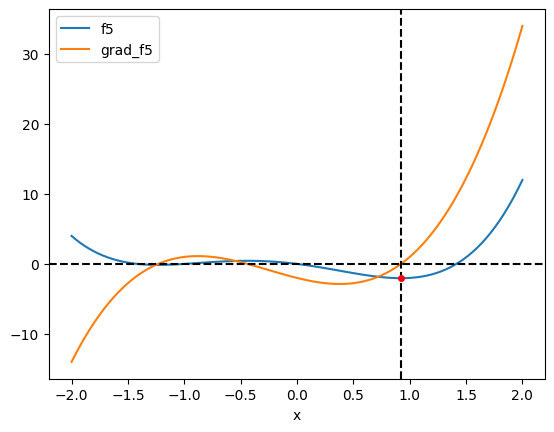

In [29]:
# plot the f5 function
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-2, 2, 100)

# Generate y values
y = f5(x)
y_grad = grad_f5(x)

# Plot the f5 function
plt.plot(x, y)
plt.plot(x, y_grad)
plt.legend(['f5', 'grad_f5'])
plt.xlabel('x')

# plot line on y = 0
plt.axhline(y=0, color='k', linestyle='--')

# plot minimum point coords
plt.axvline(x=0.92222, color='k', linestyle='--')
plt.plot(0.92222, -2.0377, marker='o', markersize=4, color='red')

plt.show()

In [30]:
x0_arr = [1, 0.5, 0, -0.5, -1]
ak_arr = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
for x0 in x0_arr:
    for ak in ak_arr:
        x, *_ = gradient_descent(f5, grad_f5, np.array([x0]), ak, 100, 1e-4, 1e-4)
        print(f"Result using x0 = {x0} and ak = {ak}: {x[-1]}")
        # minimum is ~0.92222

Result using x0 = 1 and ak = 0.1: [0.92222776]
Result using x0 = 1 and ak = 0.01: [0.92291709]
Result using x0 = 1 and ak = 0.001: [0.94461734]
Result using x0 = 1 and ak = 0.0001: [0.99980014]
Result using x0 = 1 and ak = 1e-05: [0.99998]
Result using x0 = 0.5 and ak = 0.1: [0.92224329]
Result using x0 = 0.5 and ak = 0.01: [0.92033244]
Result using x0 = 0.5 and ak = 0.001: [0.73132301]
Result using x0 = 0.5 and ak = 0.0001: [0.50054994]
Result using x0 = 0.5 and ak = 1e-05: [0.500055]
Result using x0 = 0 and ak = 0.1: [0.92221557]
Result using x0 = 0 and ak = 0.01: [0.92085355]
Result using x0 = 0 and ak = 0.001: [0.23832763]
Result using x0 = 0 and ak = 0.0001: [0.02039705]
Result using x0 = 0 and ak = 1e-05: [4.00008e-05]
Result using x0 = -0.5 and ak = 0.1: [-1.23223566]
Result using x0 = -0.5 and ak = 0.01: [-1.19767959]
Result using x0 = -0.5 and ak = 0.001: [-0.53057057]
Result using x0 = -0.5 and ak = 0.0001: [-0.50255009]
Result using x0 = -0.5 and ak = 1e-05: [-0.500005]
Resu

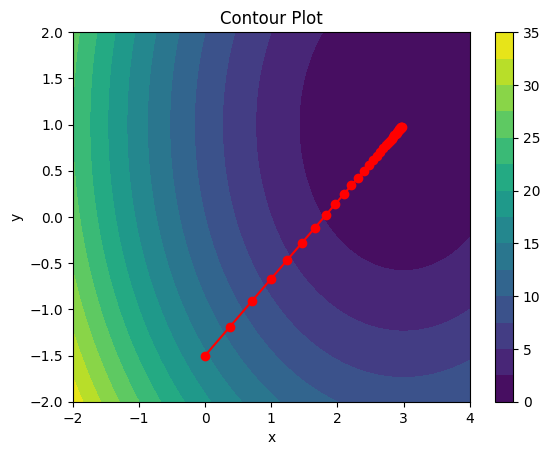

In [31]:
# For the functions 1 and 2, plot the contour around the minimum and the path defined by the iterations
import numpy as np
import matplotlib.pyplot as plt

# Generate x and y values
x = np.linspace(-2, 4, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z1 = f1((X, Y))

# Plot the contour around the minimum
c1 = plt.contourf(X, Y, Z1, levels=15)
plt.colorbar(c1)

path1 = np.array(x1_bt)
# Plot the path defined by the iterations
# path1 = np.array(grads1_bt)  # Replace with your actual path for function 1
plt.plot(path1[:,0], path1[:,1], 'ro-')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot')

# Show the plot
plt.show()

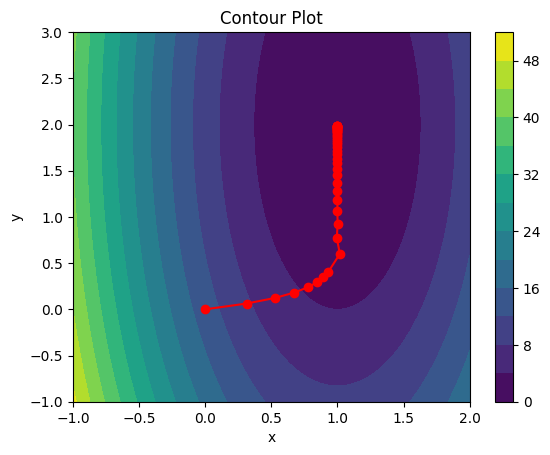

In [32]:
# For the functions 1 and 2, plot the contour around the minimum and the path defined by the iterations
import numpy as np
import matplotlib.pyplot as plt

# Generate x and y values
x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z1 = f2((X, Y))

# Plot the contour around the minimum
c1 = plt.contourf(X, Y, Z1, levels=15)
plt.colorbar(c1)

path1 = np.array(x2_bt)
# Plot the path defined by the iterations
plt.plot(path1[:,0], path1[:,1], 'ro-')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot')

# Show the plot
plt.show()

# Optimization via SGD

In [33]:
# extract the columns corresponding to the two digits
NUM_1 = 7
NUM_2 = 2
TRAIN_RATIO = .8

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_classifier_grad_loss(X, w, y_true):
    N = X.shape[1]
    z = X.T @ w
    sz = sigmoid(z)
    sz_prime = sz * (1 - sz)
    return (X @ (sz_prime * (sz - y_true))) / N

def binary_classifier_loss(X, w, y_true):
    return np.mean(np.linalg.norm(sigmoid(X.T @ w) - y_true, 2) ** 2)

def sgd_optimizer(loss, grad_loss, w0, D, alpha, batch_size, n_epochs):
    X, y = D  # Unpack the data
    d, N = X.shape
    idx = np.arange(0, N)
    
    # Initialization of history vectors
    w_history = np.zeros((n_epochs, d))  # Save weights at each iteration
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each iteration
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each iteration
    
    # Initialize weights
    w = w0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)

        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            indexes = idx[batch_start:batch_end]
            X_batch = X[:, indexes]
            y_batch = y[indexes]
            
            # Compute the gradient of the loss
            gradient = grad_loss(X_batch, w, y_batch)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            # Update weights
            w = w - alpha * gradient

        # Save the updated values
        w_history[epoch, :] = w[:, 0]
        loss_history[epoch] = loss(X, w, y)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)
    
    return w_history, loss_history, grad_norm_history

In [35]:
def prepare_dataset(X, I, train_ratio=TRAIN_RATIO):
    idx = [i for i, el in enumerate(I[0]) if el in { NUM_1, NUM_2 }]

    idx_train = idx[:int(len(idx) * train_ratio)]
    idx_test = idx[(int(len(idx) * train_ratio) + 1):]
    N = X.shape[1]
    X_hat = np.concatenate((np.ones((1, N)), X), axis=0)

    X_hat_test = X_hat[:, idx_test]
    I_test = I[:, idx_test]

    X_hat_train = X_hat[:, idx_train]
    I_train = I[:, idx_train]

    d, N = X_hat_train.shape
    Y = I_train.T[:, :]
    Y[Y == NUM_1] = 0
    Y[Y == NUM_2] = 1

    # w = np.zeros((d, 1))
    w = np.random.randn(d, 1)

    return (X_hat_train, Y), (X_hat_test, I_test), w

In [36]:
# load the dataset
import scipy

mnist = scipy.io.loadmat('MNIST.mat')
X = mnist['X']
I = mnist['I']
print(X.shape, I.shape)

(256, 1707) (1, 1707)


In [37]:
def plot_losses(losses, grad_losses, labels):
    plt.figure(figsize=(16, 10))
    plt.subplot(1, 2, 1)
    plt.title('Loss history')
    for i, loss in enumerate(losses):
        plt.plot(loss, label=labels[i])

    plt.subplot(1, 2, 2)
    plt.title('Gradient loss history')
    for i, grad_loss in enumerate(grad_losses):
        plt.plot(grad_loss, label=labels[i])

    plt.legend()
    plt.tight_layout()
    plt.show()

In [38]:
def run_optimization(train_set, w, lr=1e-2, batch_size=32, n_epochs=100):
    X_hat_train, Y = train_set
    w_hist, loss_hist, grad_loss_hist = sgd_optimizer(binary_classifier_loss, binary_classifier_grad_loss, w, (X_hat_train, Y), lr, batch_size, n_epochs)
    return w_hist, loss_hist, grad_loss_hist

def test_optimization(test_set, w, plot_nums):
    X_hat_test, I_test = test_set

    test = sigmoid(X_hat_test.T @ w)
    classification = np.where(test > 0.5, NUM_2, NUM_1)
    count_equal = np.count_nonzero(classification == I_test[0])
    accuracy = count_equal / I_test.shape[1]

    if (plot_nums):
        count = X_hat_test.shape[1]
        N_COLS = 5
        N_ROWS = int(np.ceil(count / N_COLS))
        _, axs = plt.subplots(N_ROWS, N_COLS, figsize=(10, 20))
        for i, el in enumerate(X_hat_test.T[:,1:]):
            r_i = i // N_COLS
            c_i = i % N_COLS
            axs[r_i, c_i].set_xticks([])
            axs[r_i, c_i].set_yticks([])
            axs[r_i, c_i].set_title(f"{classification[i]} {[I_test[0, i]]}")
            axs[r_i, c_i].imshow(el.reshape(16, 16), cmap='seismic')

        plt.show()

    return accuracy

In [39]:
def run(dataset_train_ratio, **kwargs):
    train_set, test_set, w = prepare_dataset(X, I, train_ratio=dataset_train_ratio)
    w_hist, loss_hist, grad_loss_hist = run_optimization(train_set, w, kwargs["lr"], kwargs["batch_size"], kwargs["n_epochs"])
    accuracy = test_optimization(test_set, w_hist[-1], False)
    return (loss_hist, grad_loss_hist, accuracy)

Running optimization for lr=1, batch_size=16, n_epochs=100 ...

 done ✅, accuracy = 0.9726027397260274
Running optimization for lr=0.1, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.9726027397260274
Running optimization for lr=0.01, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.7671232876712328
Running optimization for lr=0.001, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.3698630136986301
Running optimization for lr=0.0001, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.2602739726027397
Running optimization for lr=1e-05, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.2328767123287671


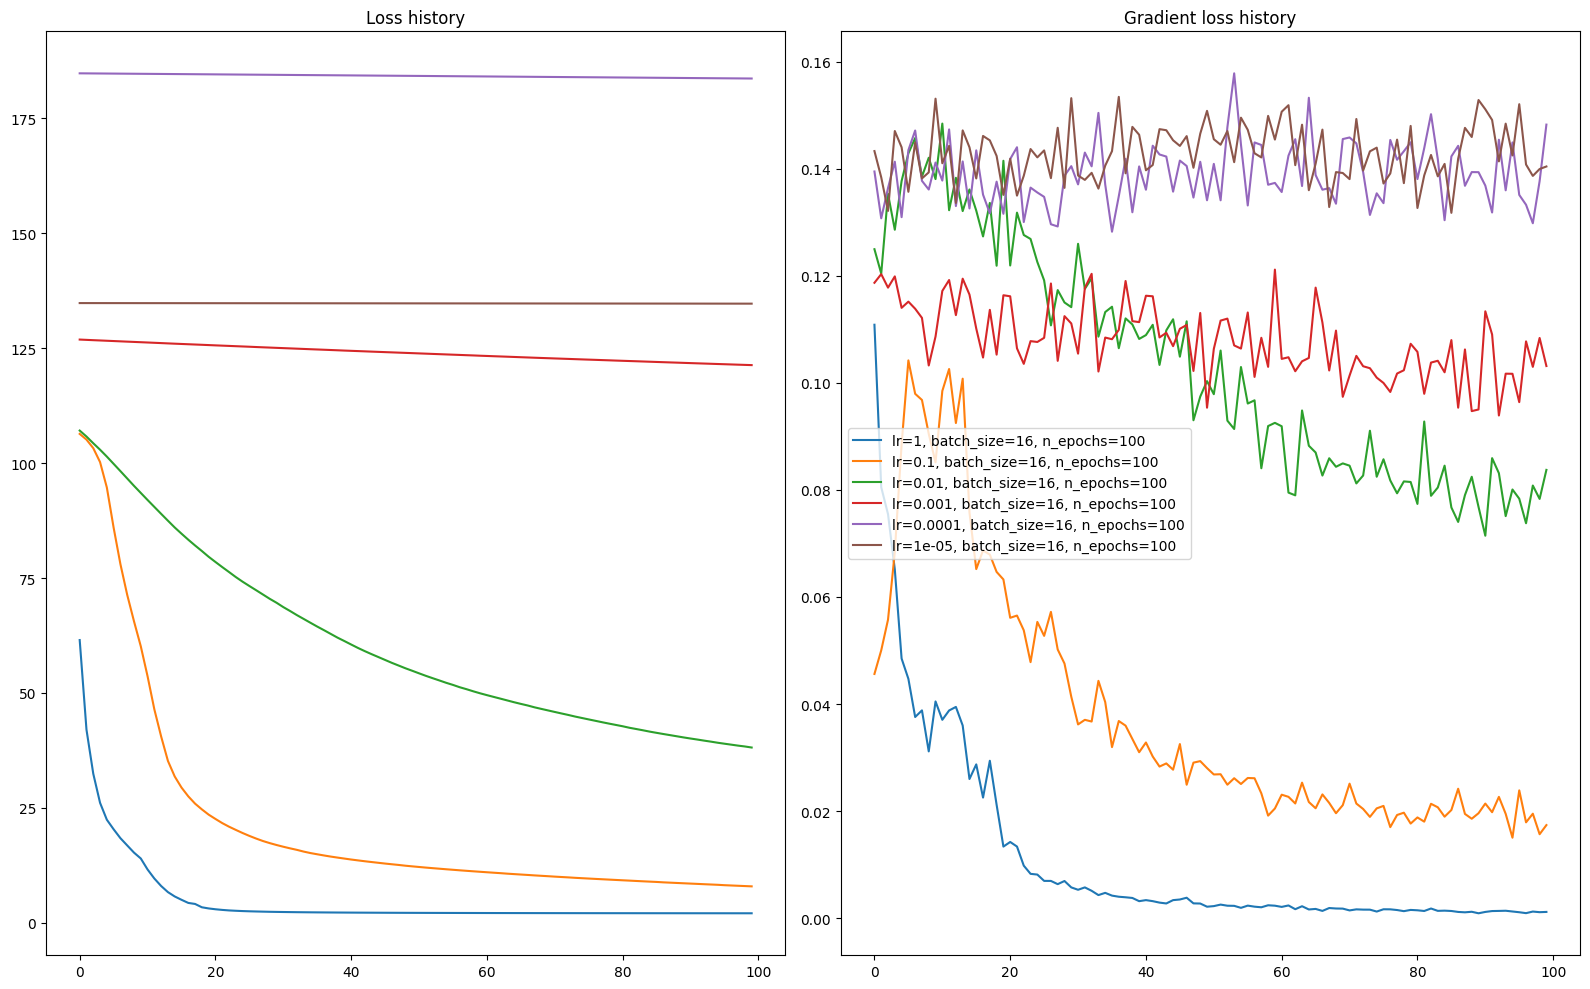

Running optimization for lr=1, batch_size=32, n_epochs=100 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=32, n_epochs=100 ... done ✅, accuracy = 0.9315068493150684
Running optimization for lr=0.01, batch_size=32, n_epochs=100 ... done ✅, accuracy = 0.8904109589041096
Running optimization for lr=0.001, batch_size=32, n_epochs=100 ... done ✅, accuracy = 0.6986301369863014
Running optimization for lr=0.0001, batch_size=32, n_epochs=100 ... done ✅, accuracy = 0.6986301369863014
Running optimization for lr=1e-05, batch_size=32, n_epochs=100 ... done ✅, accuracy = 0.2054794520547945


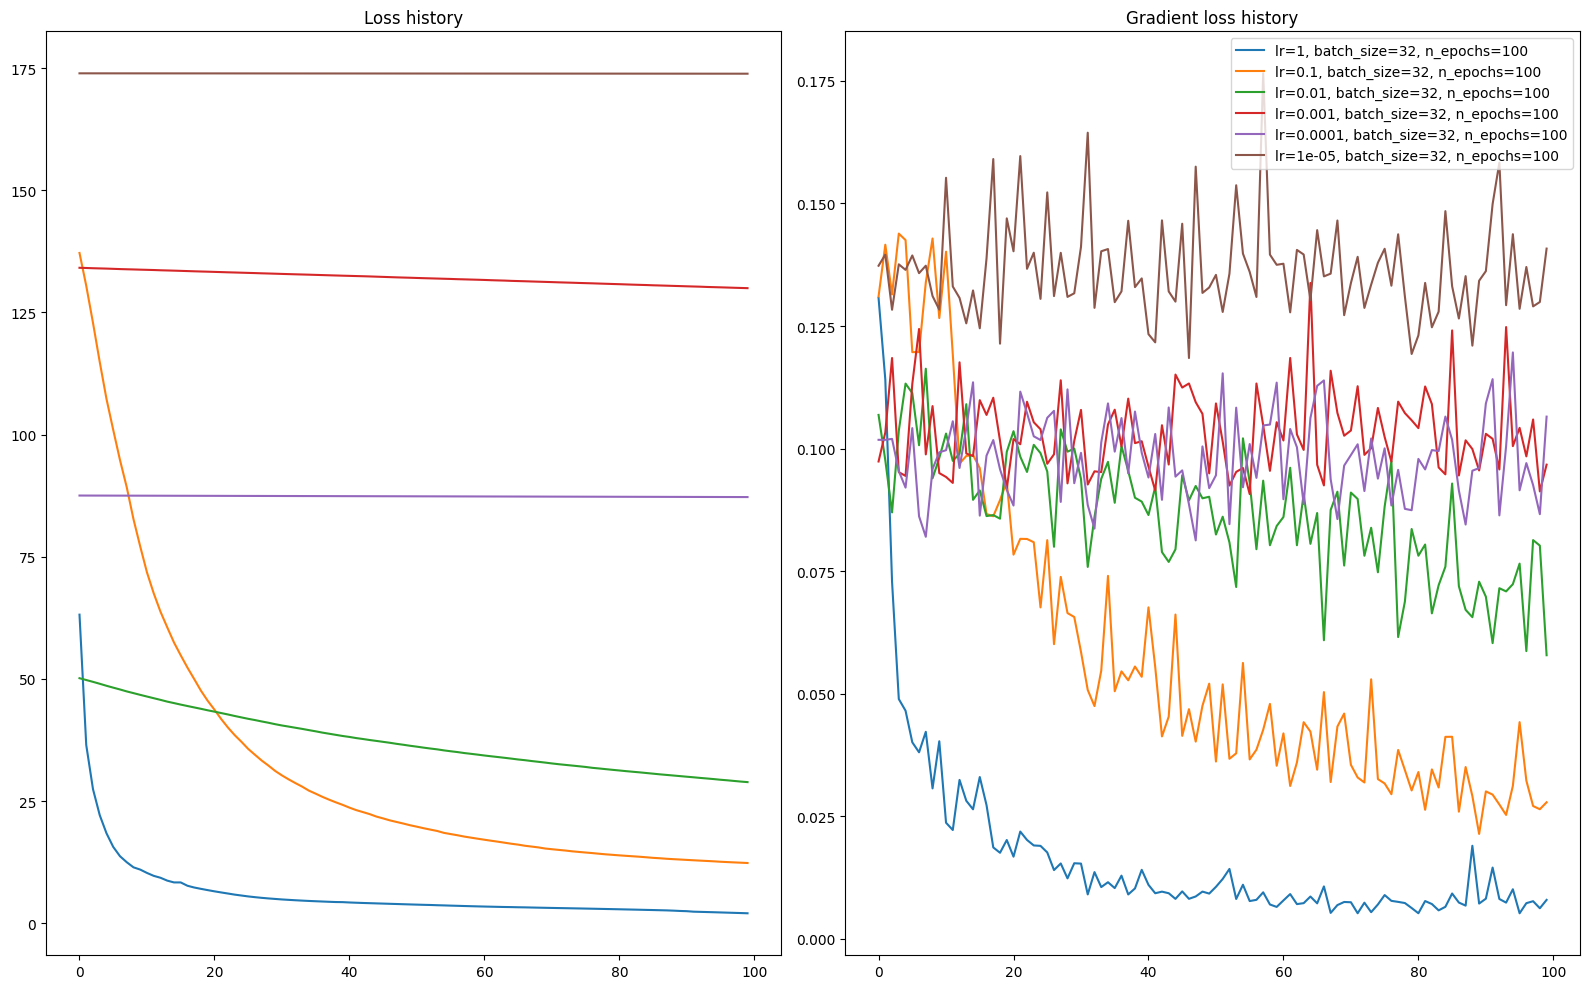

Running optimization for lr=1, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.9315068493150684
Running optimization for lr=0.1, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.821917808219178
Running optimization for lr=0.01, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.7945205479452054
Running optimization for lr=0.001, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.1917808219178082
Running optimization for lr=0.0001, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.3835616438356164
Running optimization for lr=1e-05, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.8082191780821918


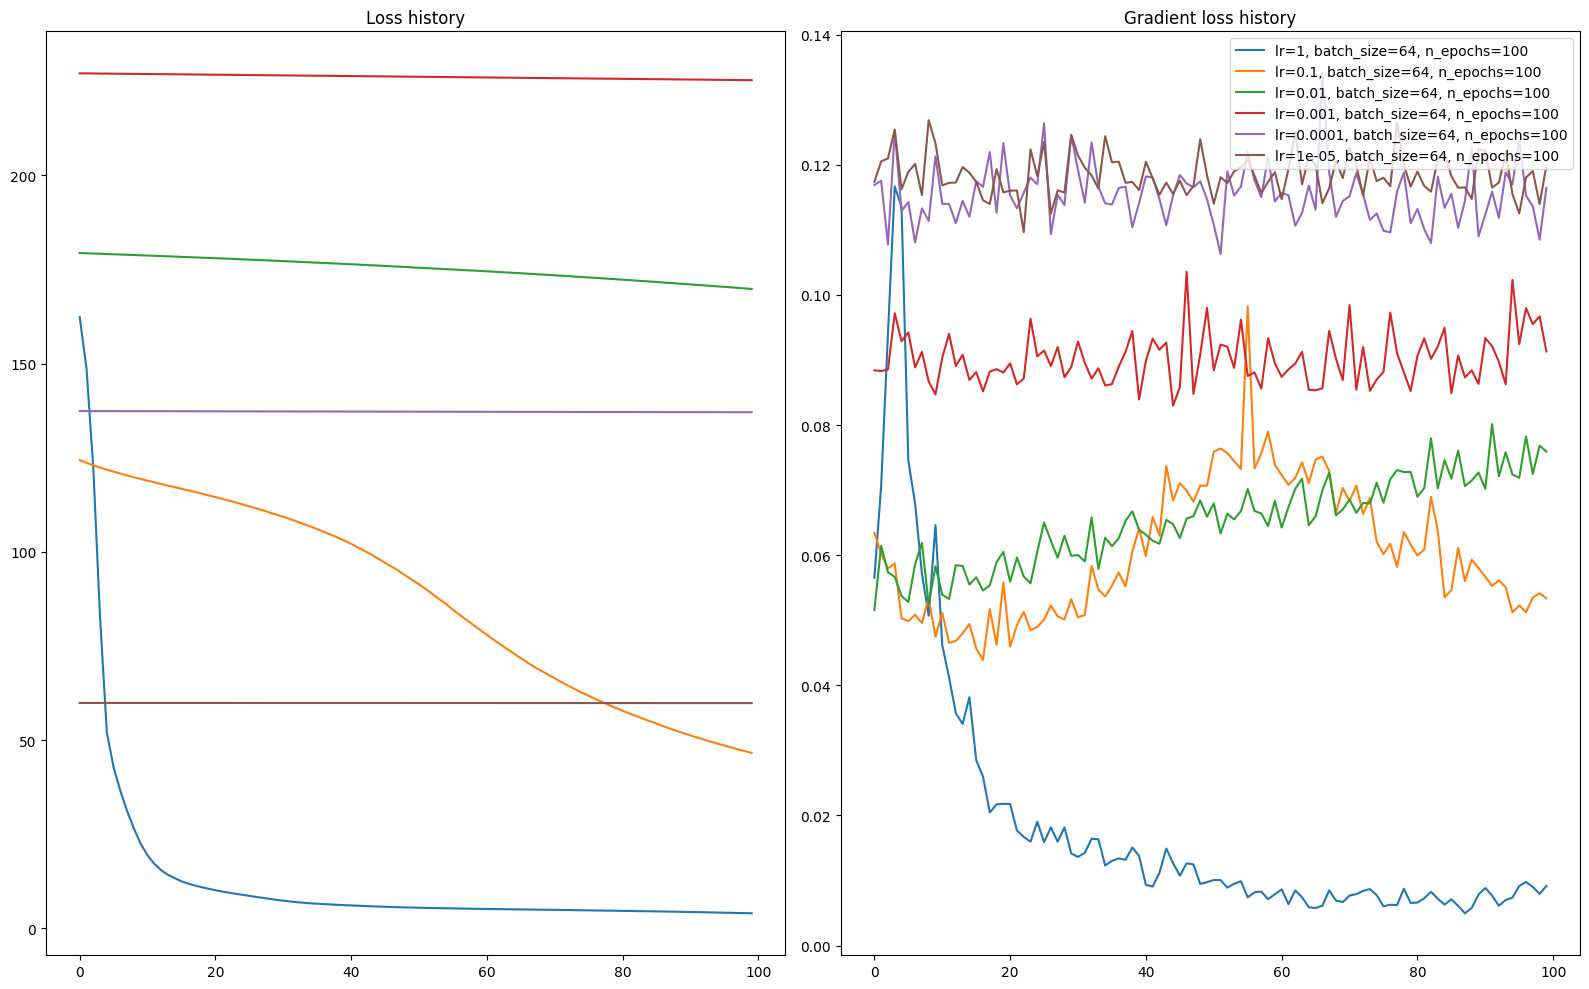

Running optimization for lr=1, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.958904109589041
Running optimization for lr=0.1, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.8904109589041096
Running optimization for lr=0.01, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.4931506849315068
Running optimization for lr=0.001, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.2054794520547945
Running optimization for lr=0.0001, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.7945205479452054
Running optimization for lr=1e-05, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.8356164383561644


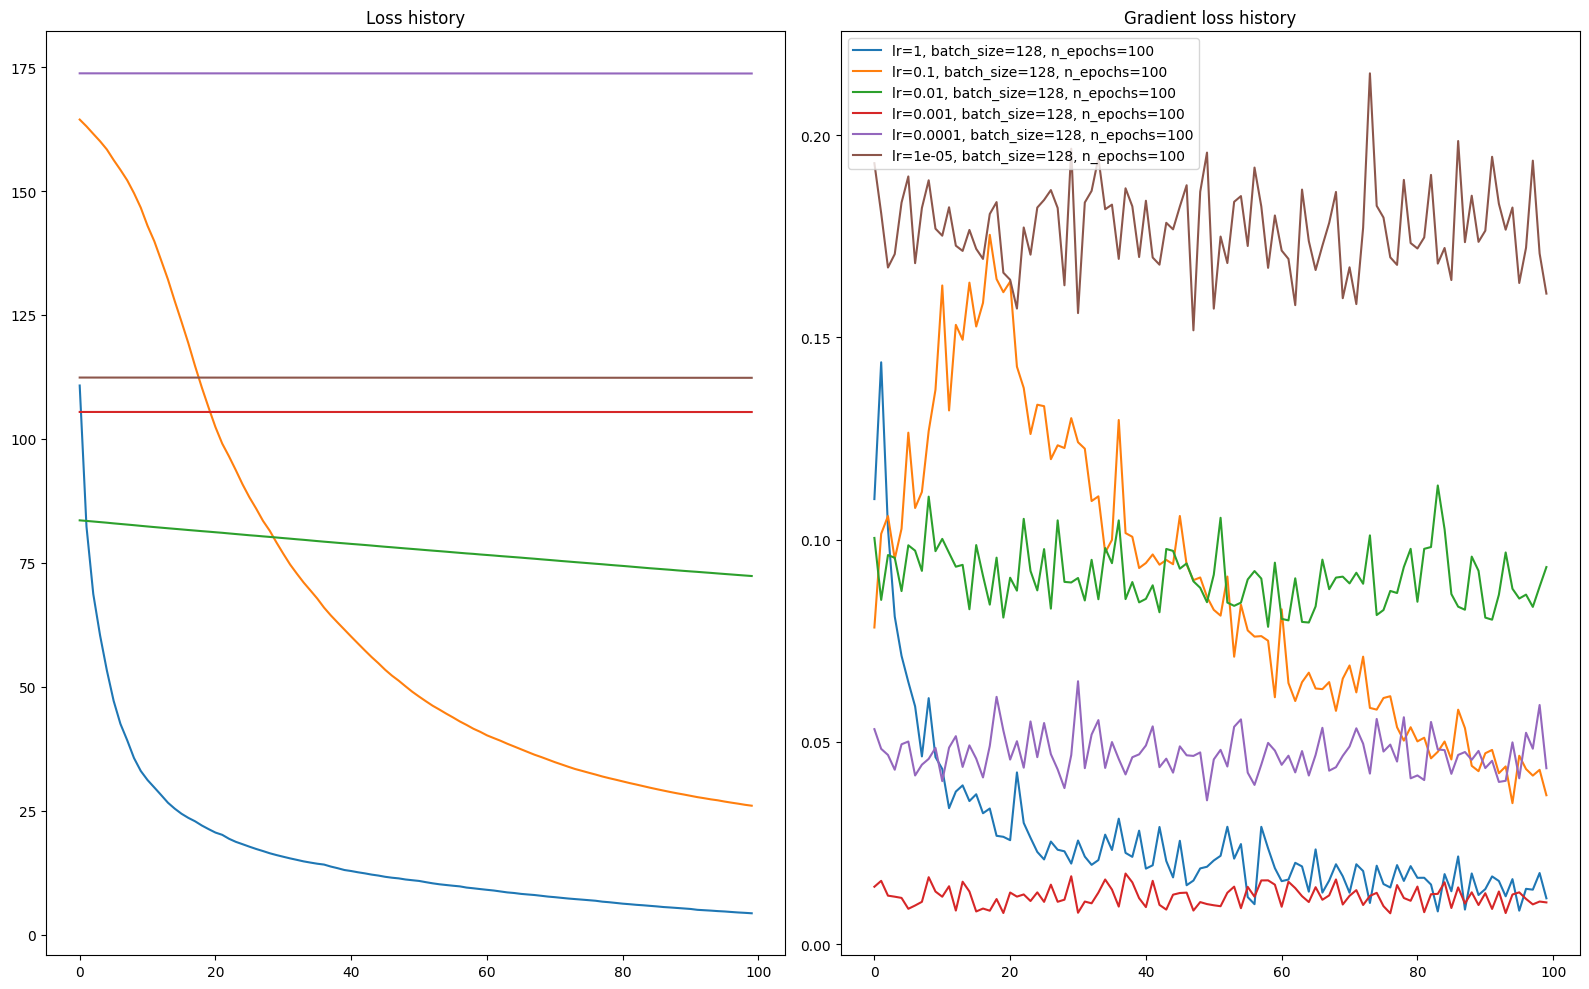

Running optimization for lr=1, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.1, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.01, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.9726027397260274
Running optimization for lr=0.001, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.7534246575342466
Running optimization for lr=0.0001, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.4246575342465753
Running optimization for lr=1e-05, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.7671232876712328


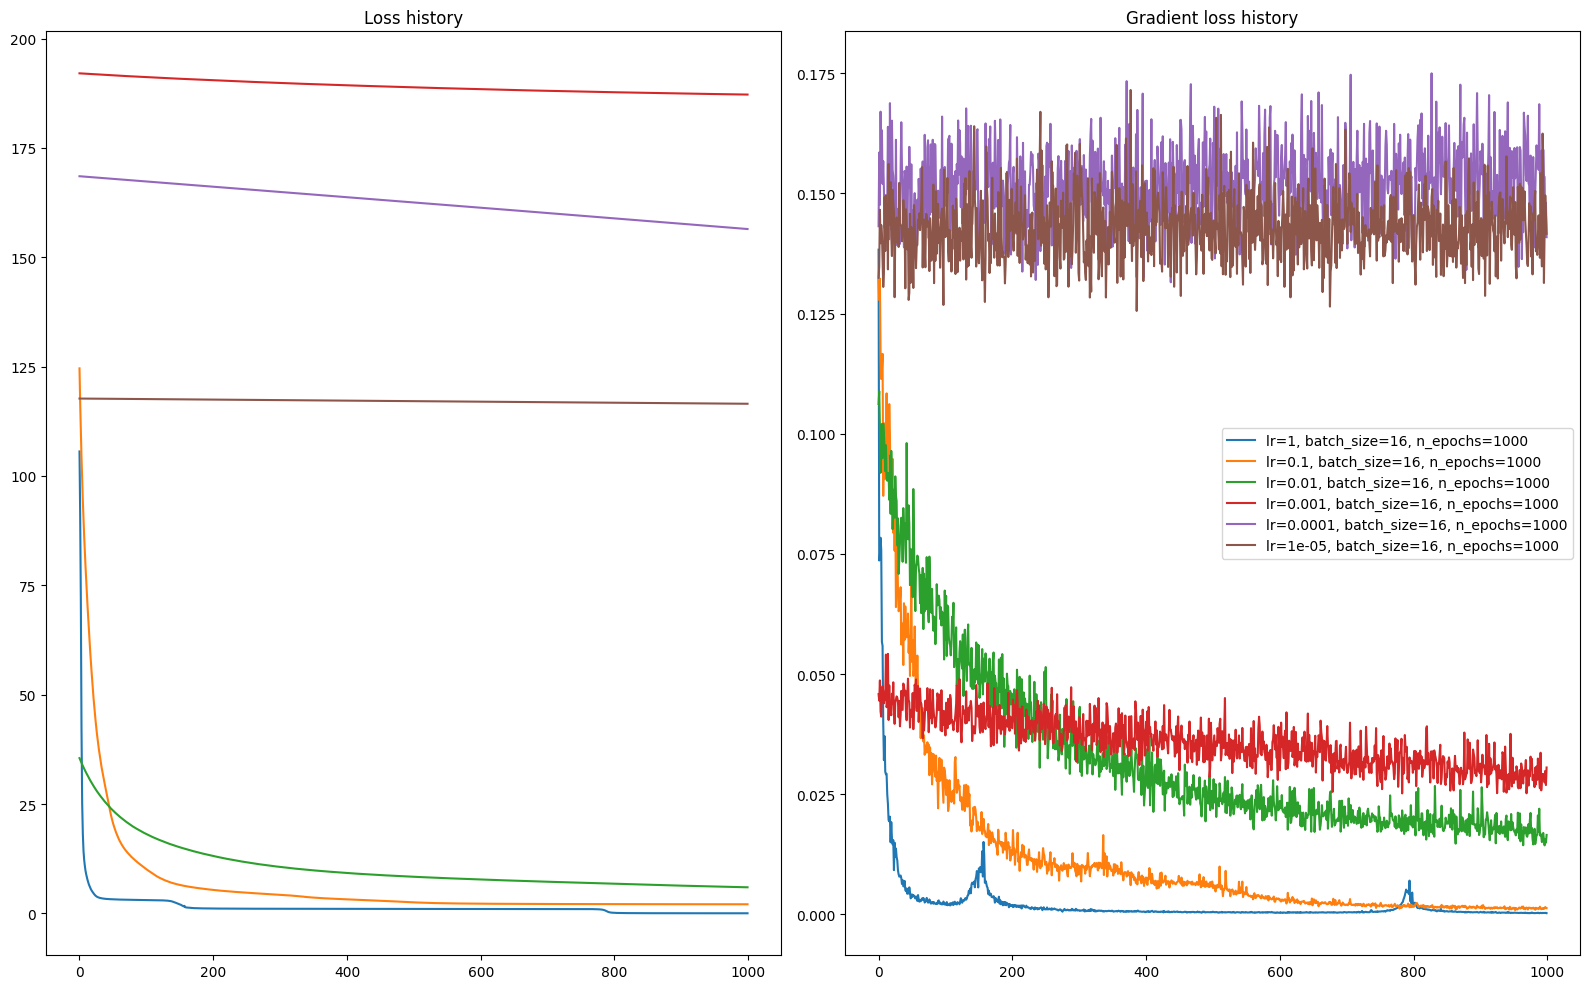

Running optimization for lr=1, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.1, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.9726027397260274
Running optimization for lr=0.01, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.9178082191780822
Running optimization for lr=0.001, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.547945205479452
Running optimization for lr=0.0001, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.273972602739726
Running optimization for lr=1e-05, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.547945205479452


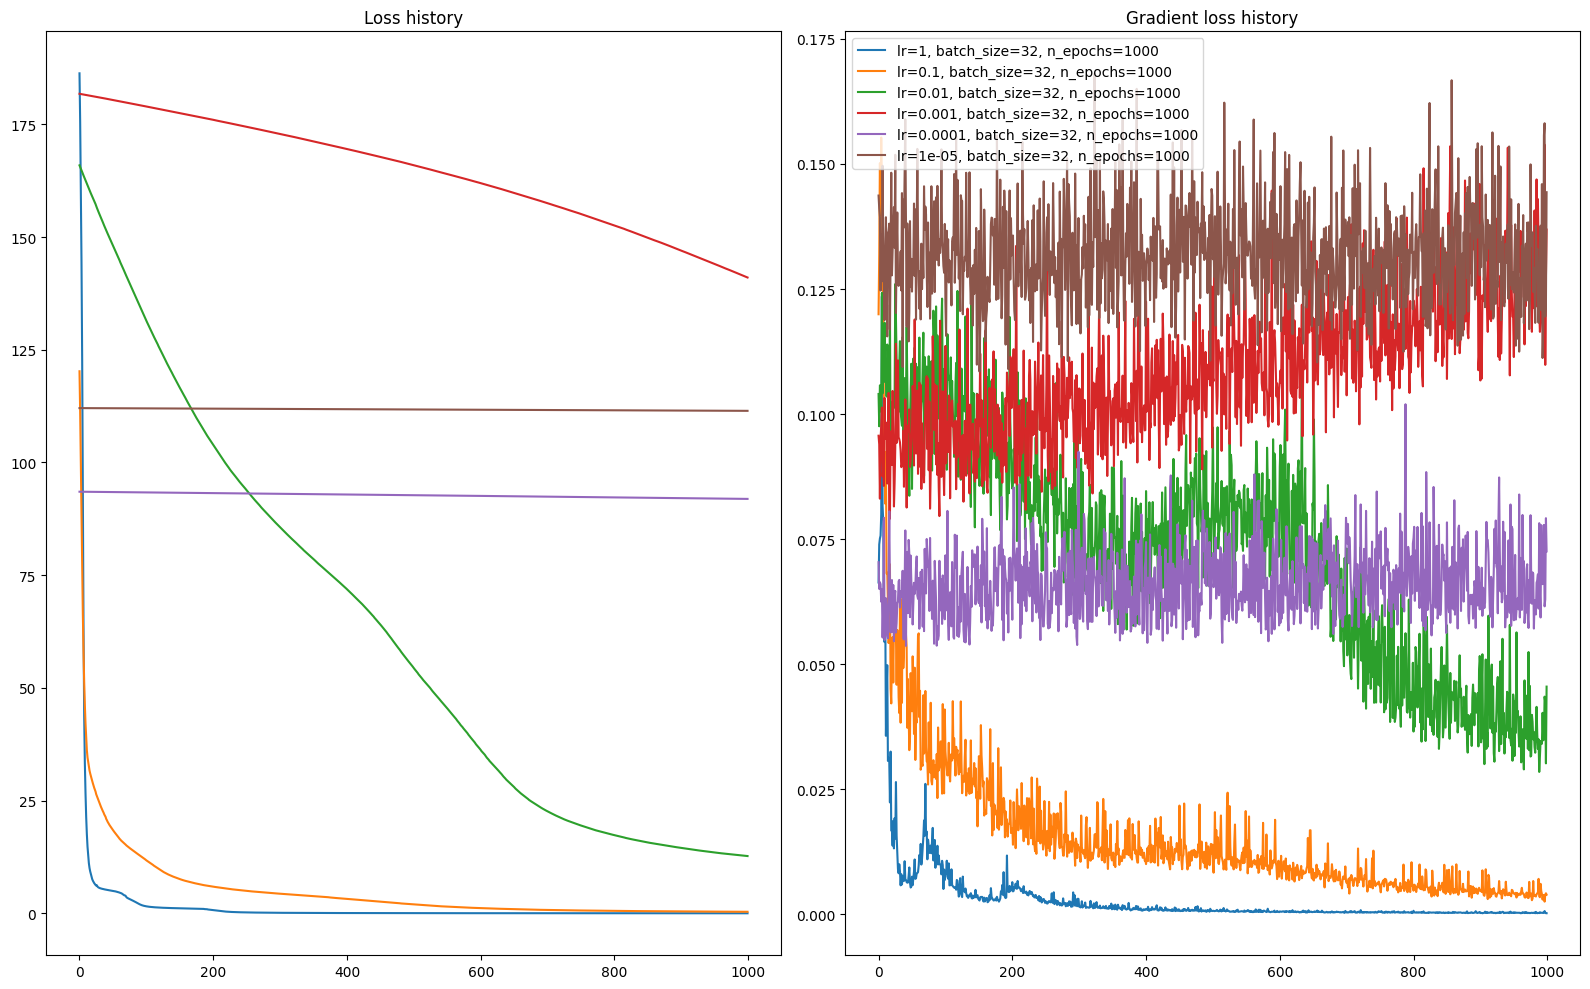

Running optimization for lr=1, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 0.9315068493150684
Running optimization for lr=0.01, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 0.7945205479452054
Running optimization for lr=0.001, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 0.3287671232876712
Running optimization for lr=0.0001, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 0.6438356164383562
Running optimization for lr=1e-05, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 0.8082191780821918


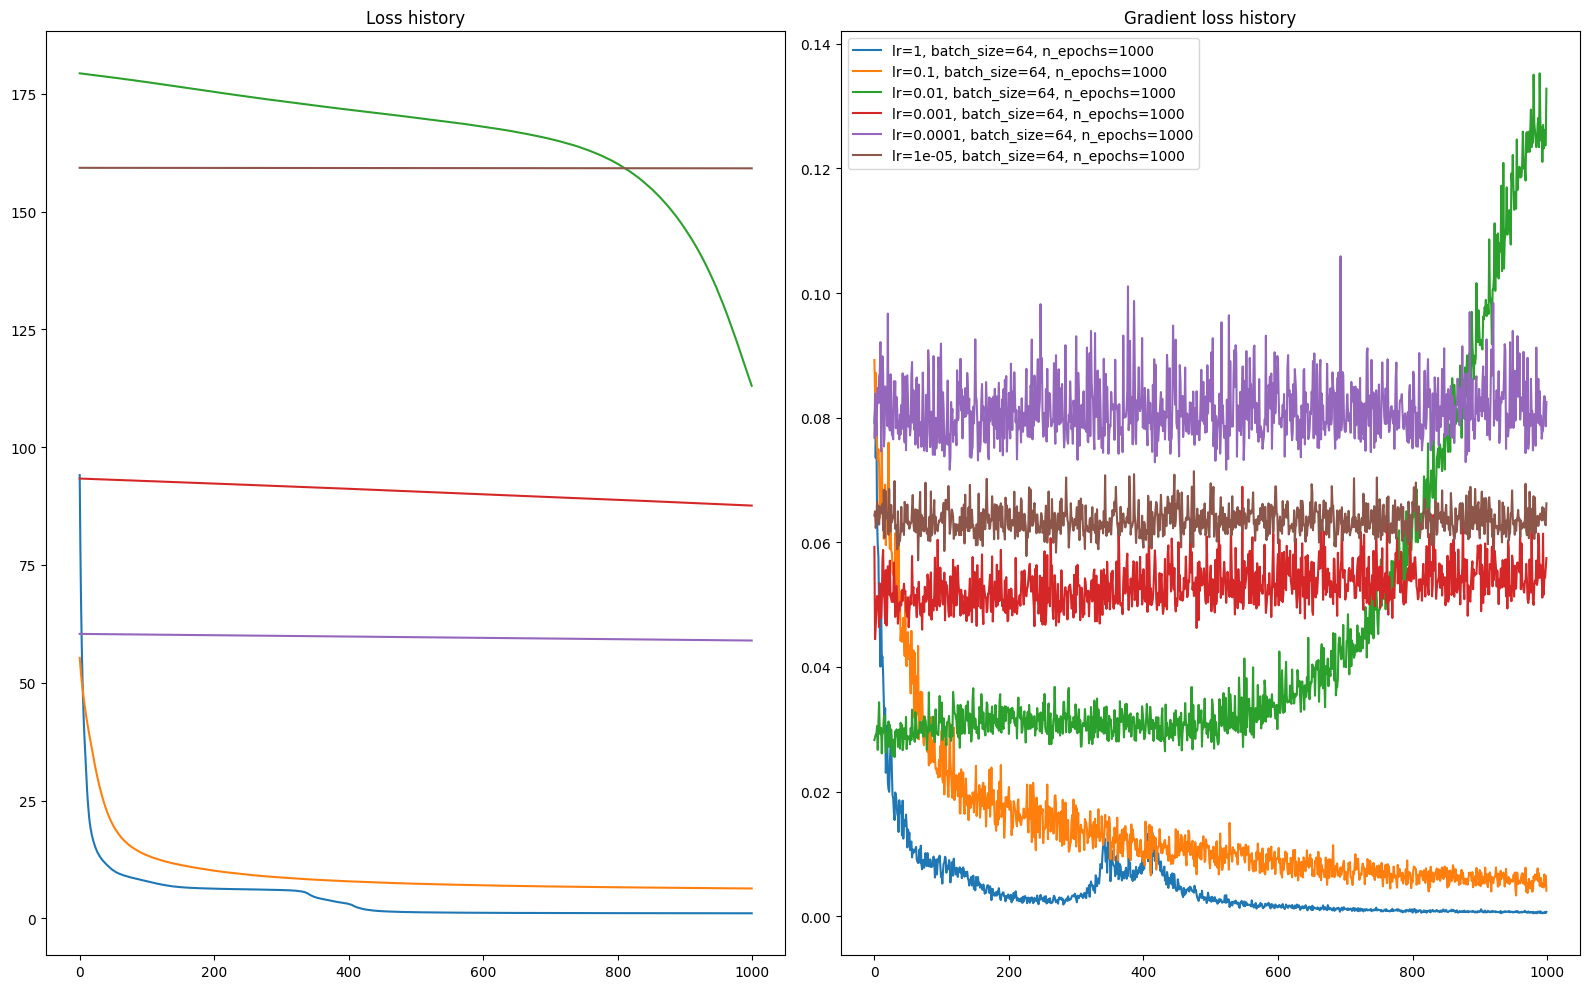

Running optimization for lr=1, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.01, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 0.7534246575342466
Running optimization for lr=0.001, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 0.821917808219178
Running optimization for lr=0.0001, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 0.1780821917808219
Running optimization for lr=1e-05, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 0.6575342465753424


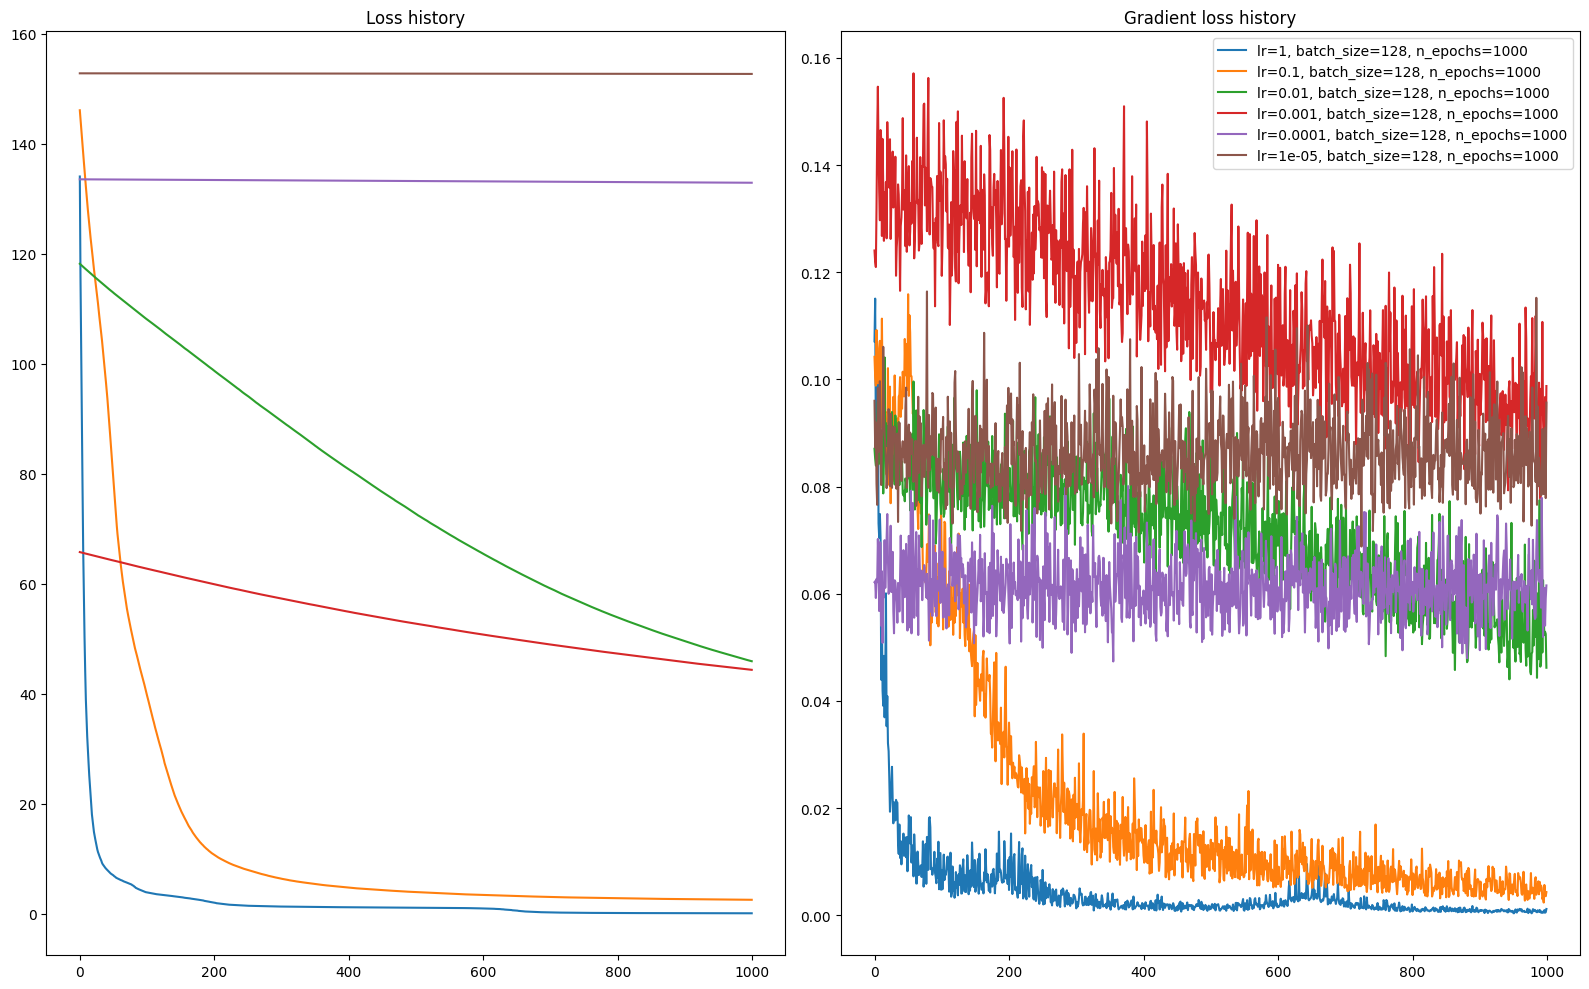

Running optimization for lr=1, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 0.9726027397260274
Running optimization for lr=0.1, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.01, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 0.9452054794520548
Running optimization for lr=0.001, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.0001, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 0.8356164383561644
Running optimization for lr=1e-05, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 0.8767123287671232


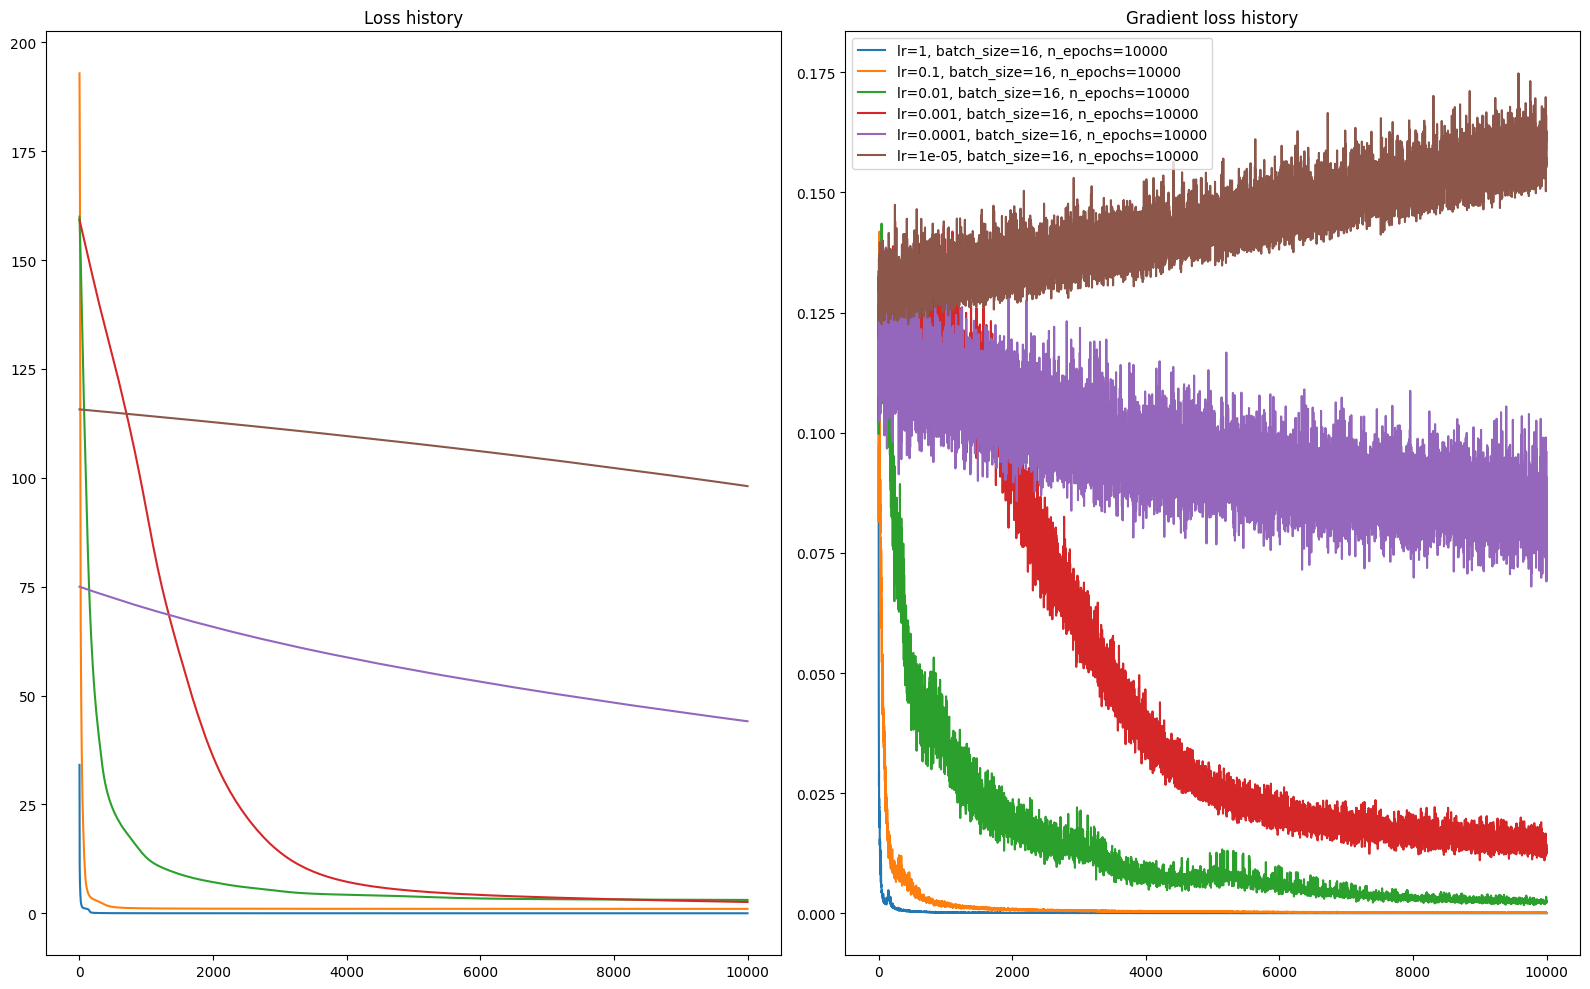

Running optimization for lr=1, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.01, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.001, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 0.2054794520547945
Running optimization for lr=0.0001, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 0.3287671232876712
Running optimization for lr=1e-05, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 0.1232876712328767


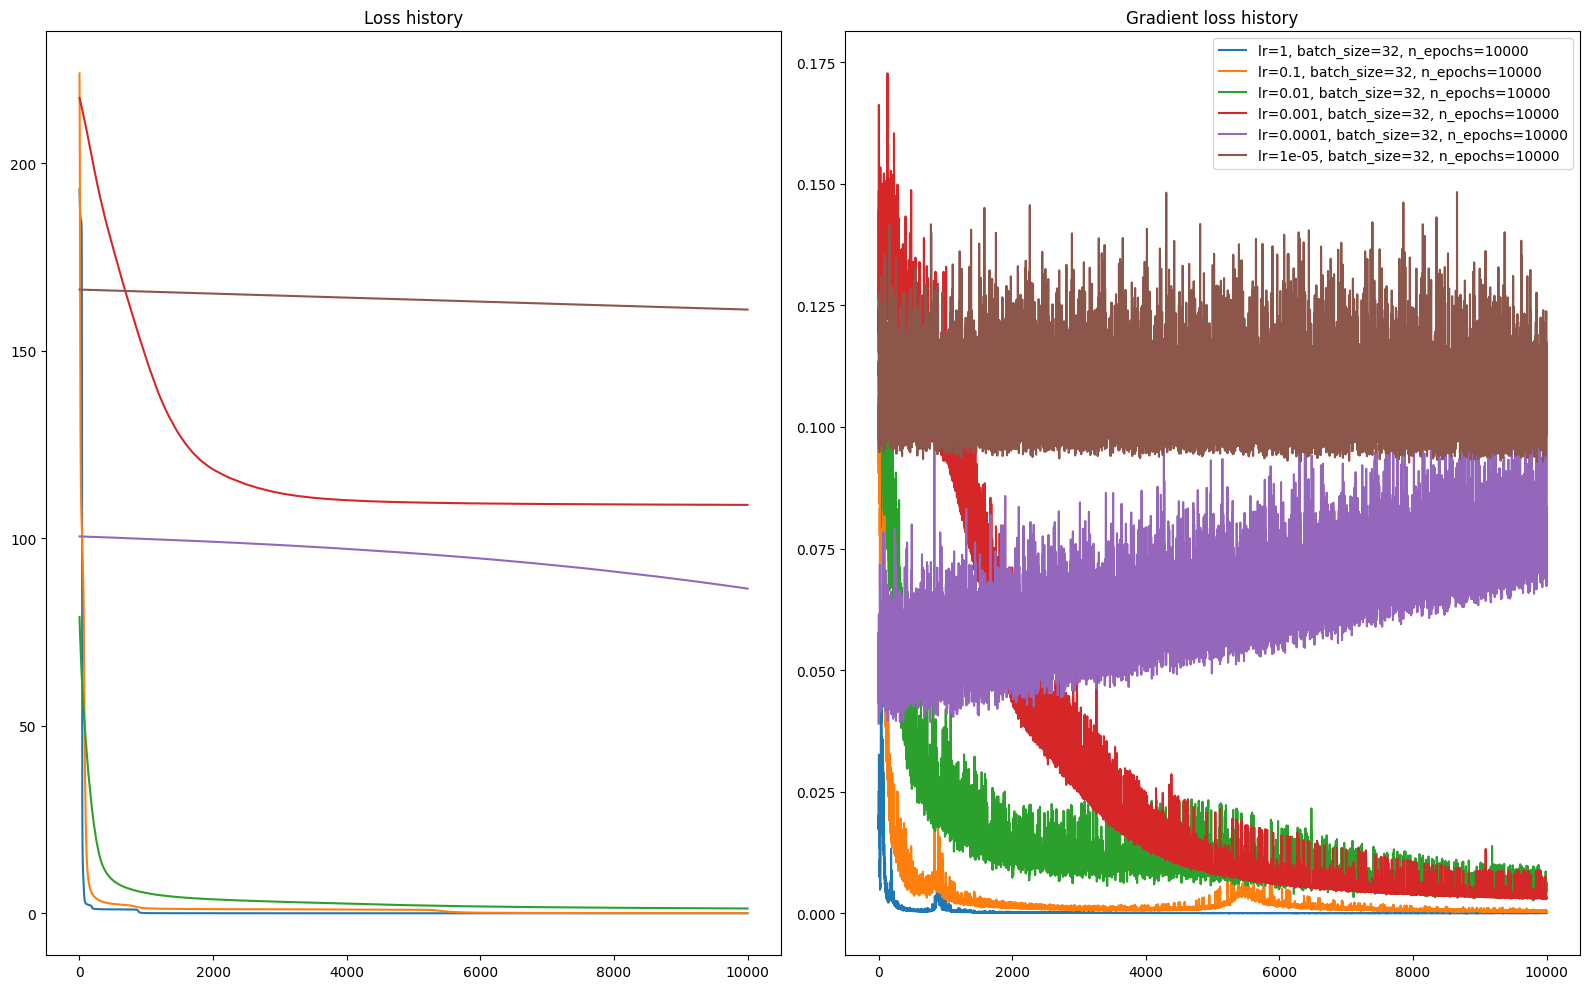

Running optimization for lr=1, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.1, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 0.958904109589041
Running optimization for lr=0.01, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.001, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 0.8767123287671232
Running optimization for lr=0.0001, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 0.1643835616438356
Running optimization for lr=1e-05, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 0.7671232876712328


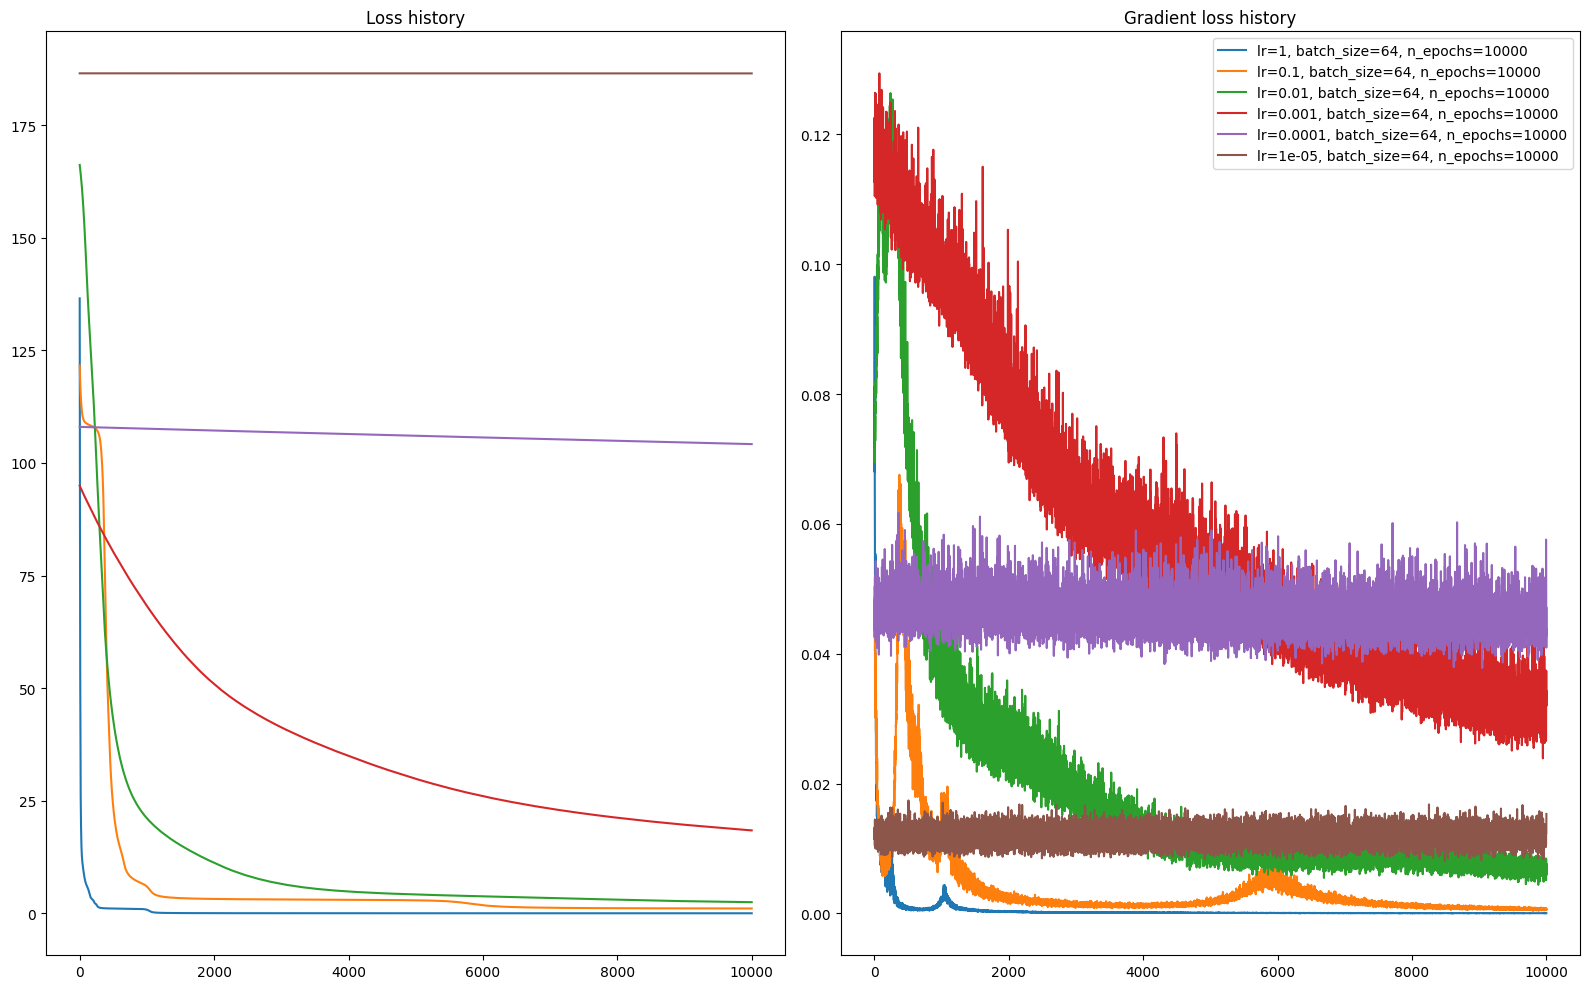

Running optimization for lr=1, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.01, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 0.9452054794520548
Running optimization for lr=0.001, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 0.3561643835616438
Running optimization for lr=0.0001, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 0.4931506849315068
Running optimization for lr=1e-05, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 0.3972602739726027


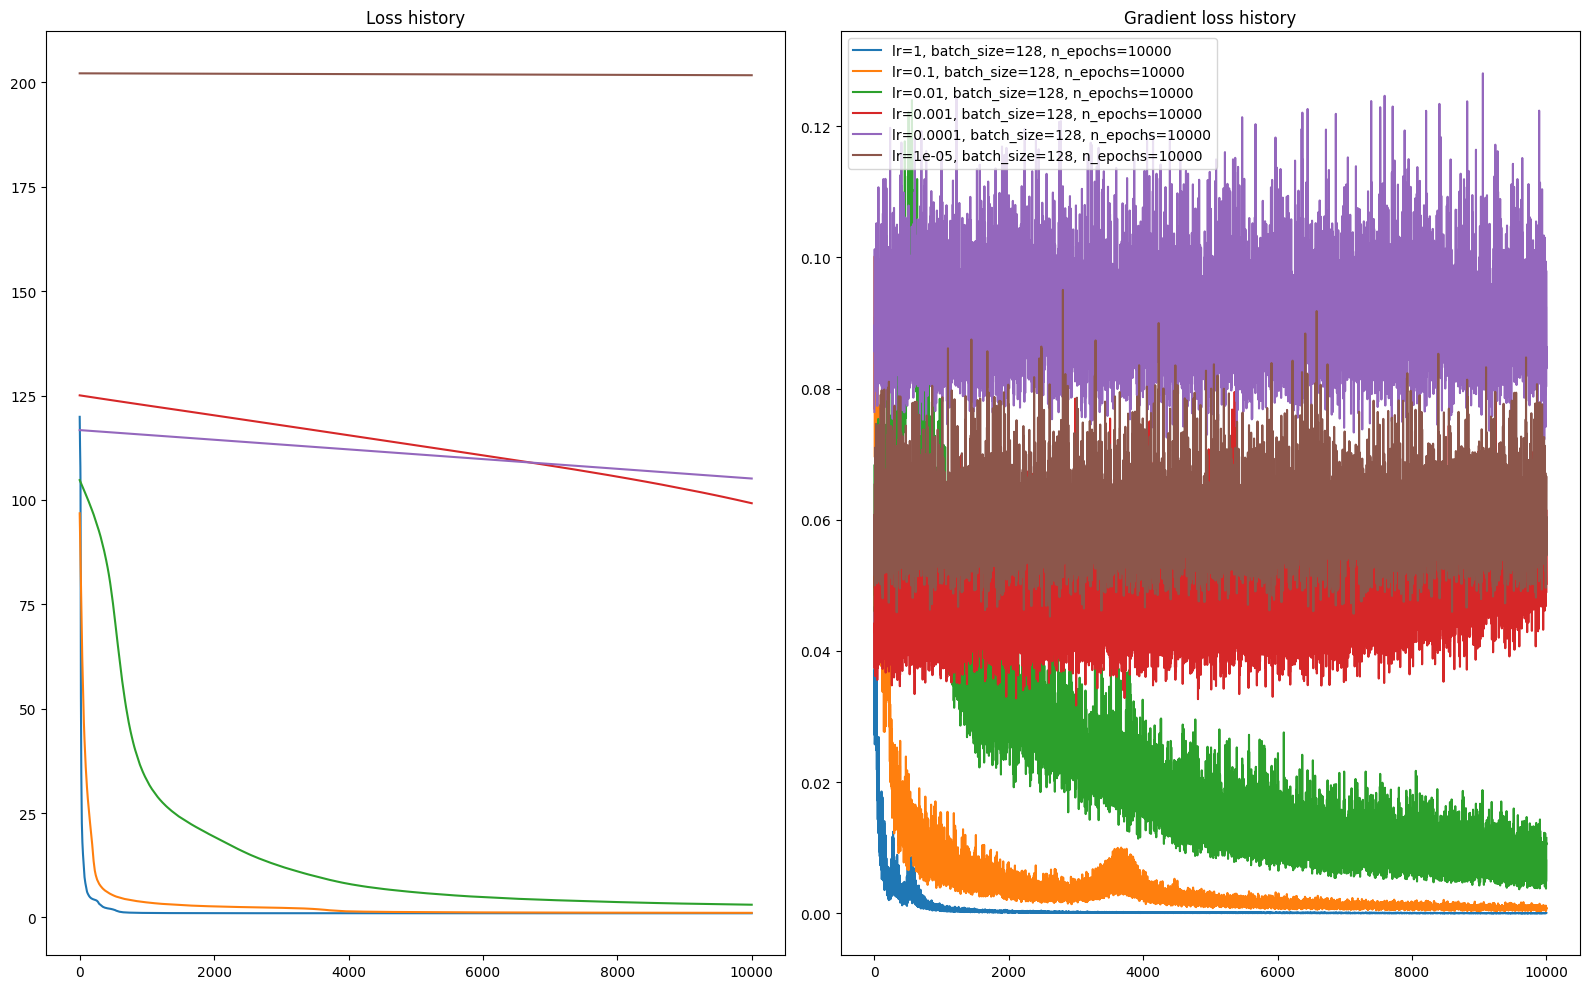

In [40]:
# ================================================================
# ==================== WARN: HIGH RUN TIME =======================
# ================================================================

lr_arr = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
batch_size_arr = [16, 32, 64, 128]
n_epochs_arr = [100, 1000, 10000]

loss_histories = []
grad_loss_histories = []
labels = []

for n_epochs in n_epochs_arr:
    for batch_size in batch_size_arr:
        for lr in lr_arr:
            print(f"Running optimization for lr={lr}, batch_size={batch_size}, n_epochs={n_epochs} ...", end="")
            loss_hist, grad_loss_hist, accuracy = run(TRAIN_RATIO, lr=lr, batch_size=batch_size, n_epochs=n_epochs)

            loss_histories.append(loss_hist)
            grad_loss_histories.append(grad_loss_hist)
            labels.append(f"lr={lr}, batch_size={batch_size}, n_epochs={n_epochs}")
            print(f" done ✅, accuracy = {accuracy}")
        plot_losses(loss_histories, grad_loss_histories, labels)
        loss_histories = []
        grad_loss_histories = []
        labels = []


### Now using .5 train ratio

Running optimization for lr=1, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.1, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.958904109589041
Running optimization for lr=0.01, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.2054794520547945
Running optimization for lr=0.001, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.273972602739726
Running optimization for lr=0.0001, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.7945205479452054
Running optimization for lr=1e-05, batch_size=16, n_epochs=100 ... done ✅, accuracy = 0.1232876712328767


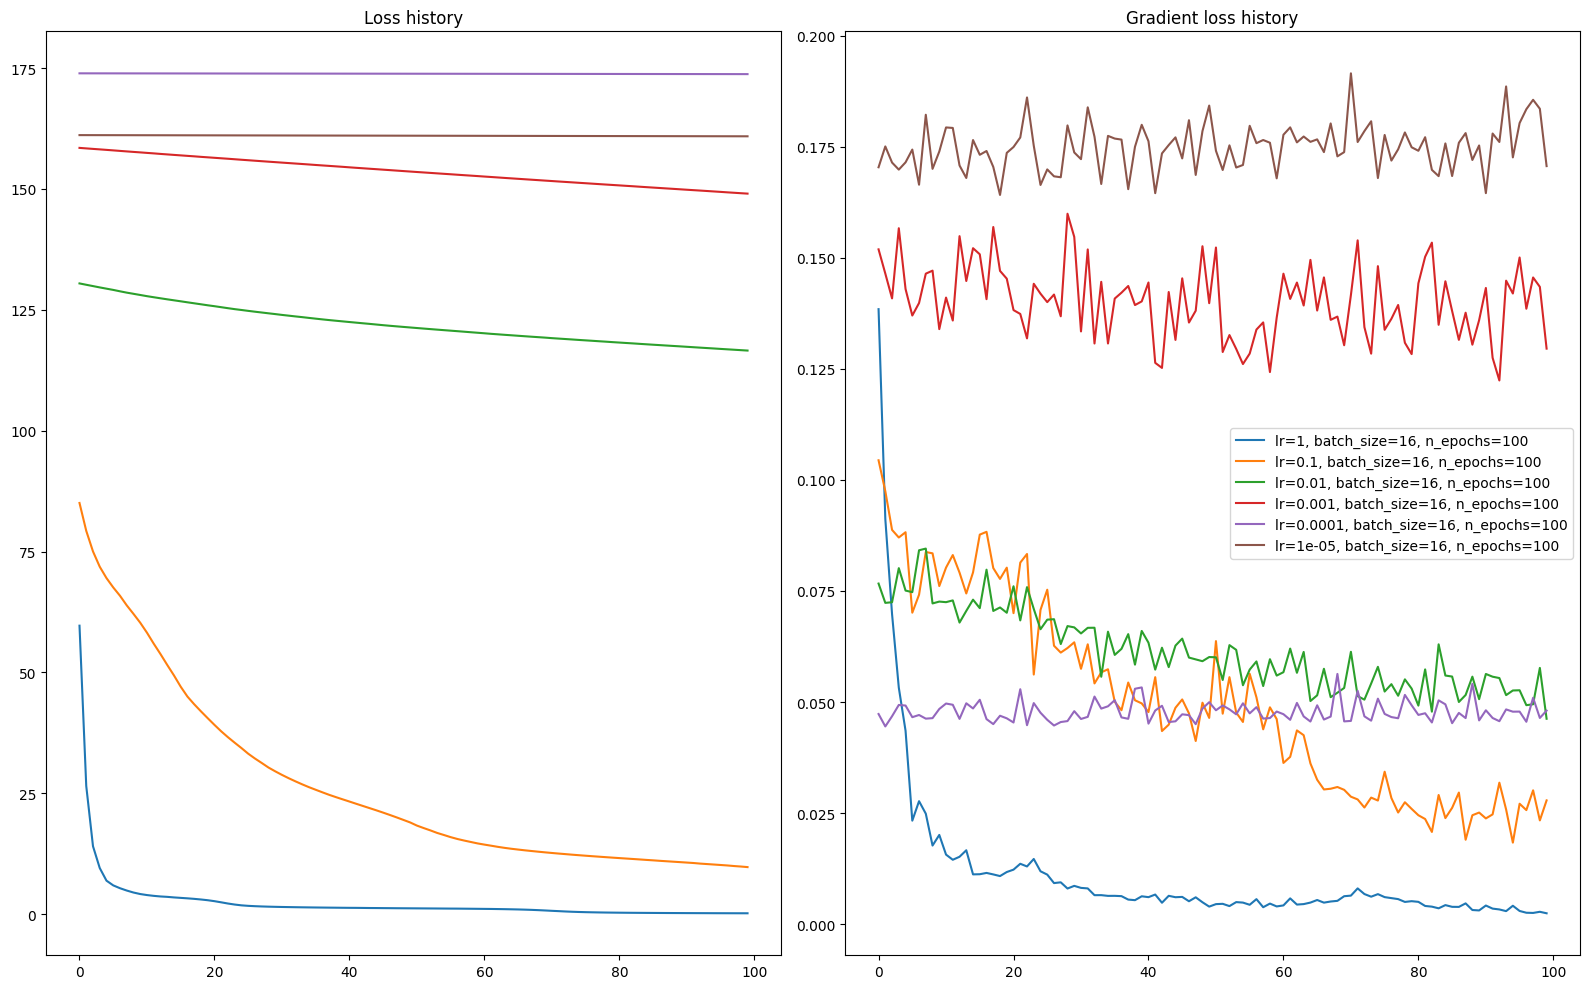

Running optimization for lr=1, batch_size=32, n_epochs=100 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=32, n_epochs=100 ... done ✅, accuracy = 0.9178082191780822
Running optimization for lr=0.01, batch_size=32, n_epochs=100 ... done ✅, accuracy = 0.7123287671232876
Running optimization for lr=0.001, batch_size=32, n_epochs=100 ... done ✅, accuracy = 0.2328767123287671
Running optimization for lr=0.0001, batch_size=32, n_epochs=100 ... done ✅, accuracy = 0.684931506849315
Running optimization for lr=1e-05, batch_size=32, n_epochs=100 ... done ✅, accuracy = 0.7945205479452054


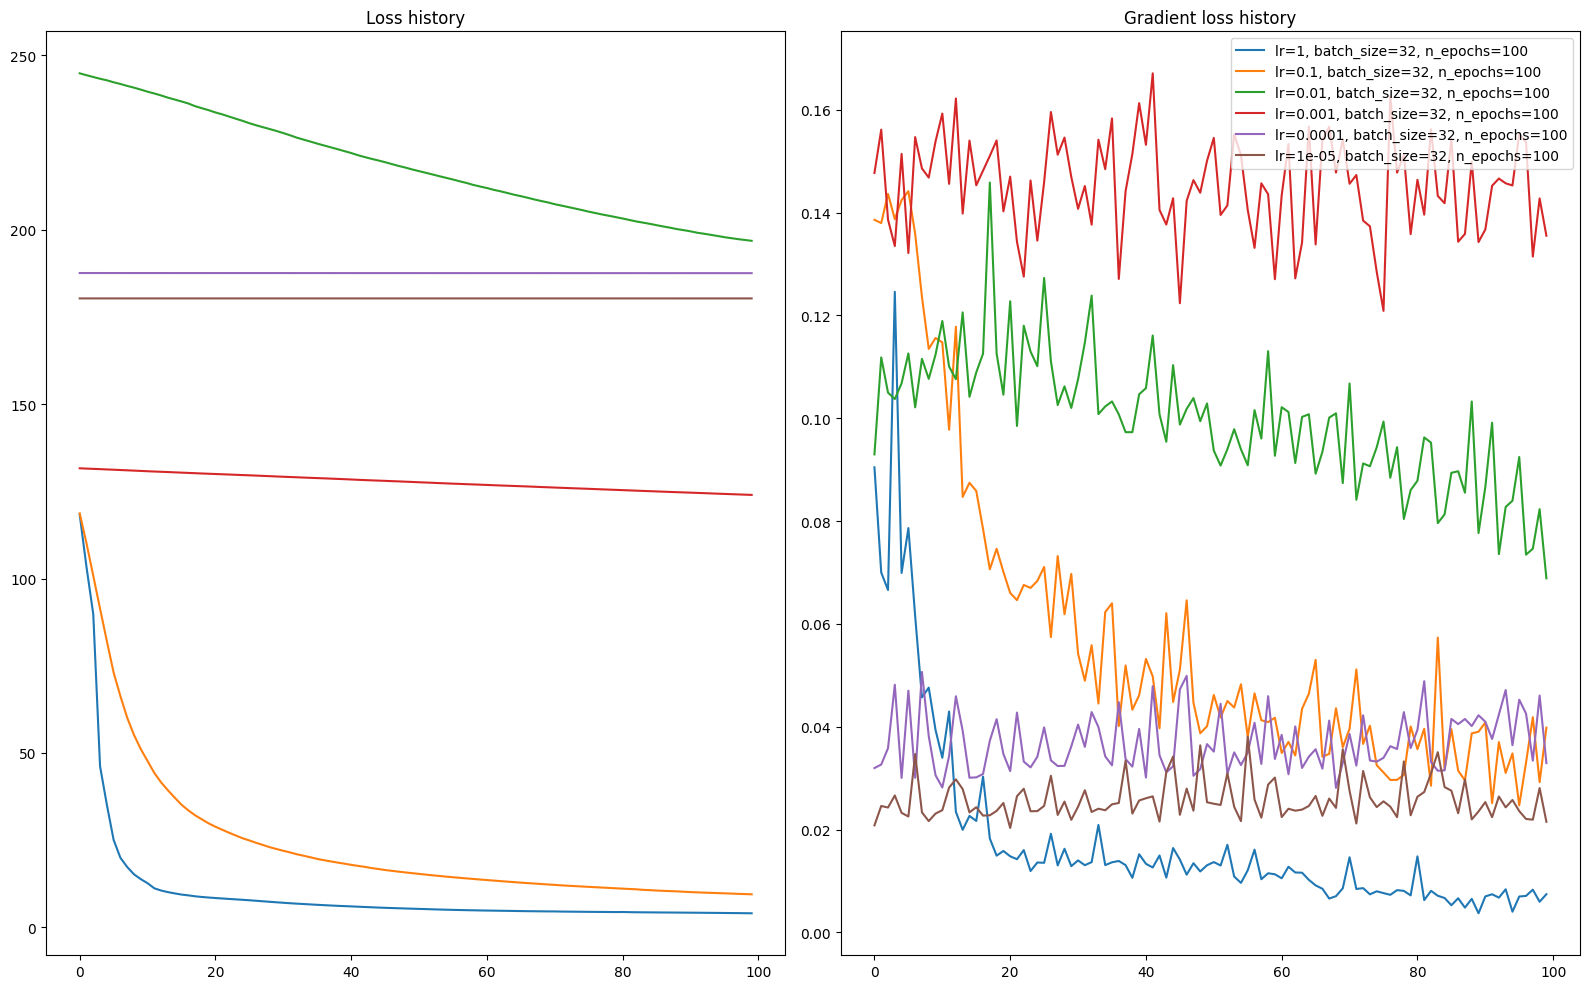

Running optimization for lr=1, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.958904109589041
Running optimization for lr=0.1, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.9041095890410958
Running optimization for lr=0.01, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.7534246575342466
Running optimization for lr=0.001, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.8082191780821918
Running optimization for lr=0.0001, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.8356164383561644
Running optimization for lr=1e-05, batch_size=64, n_epochs=100 ... done ✅, accuracy = 0.2602739726027397


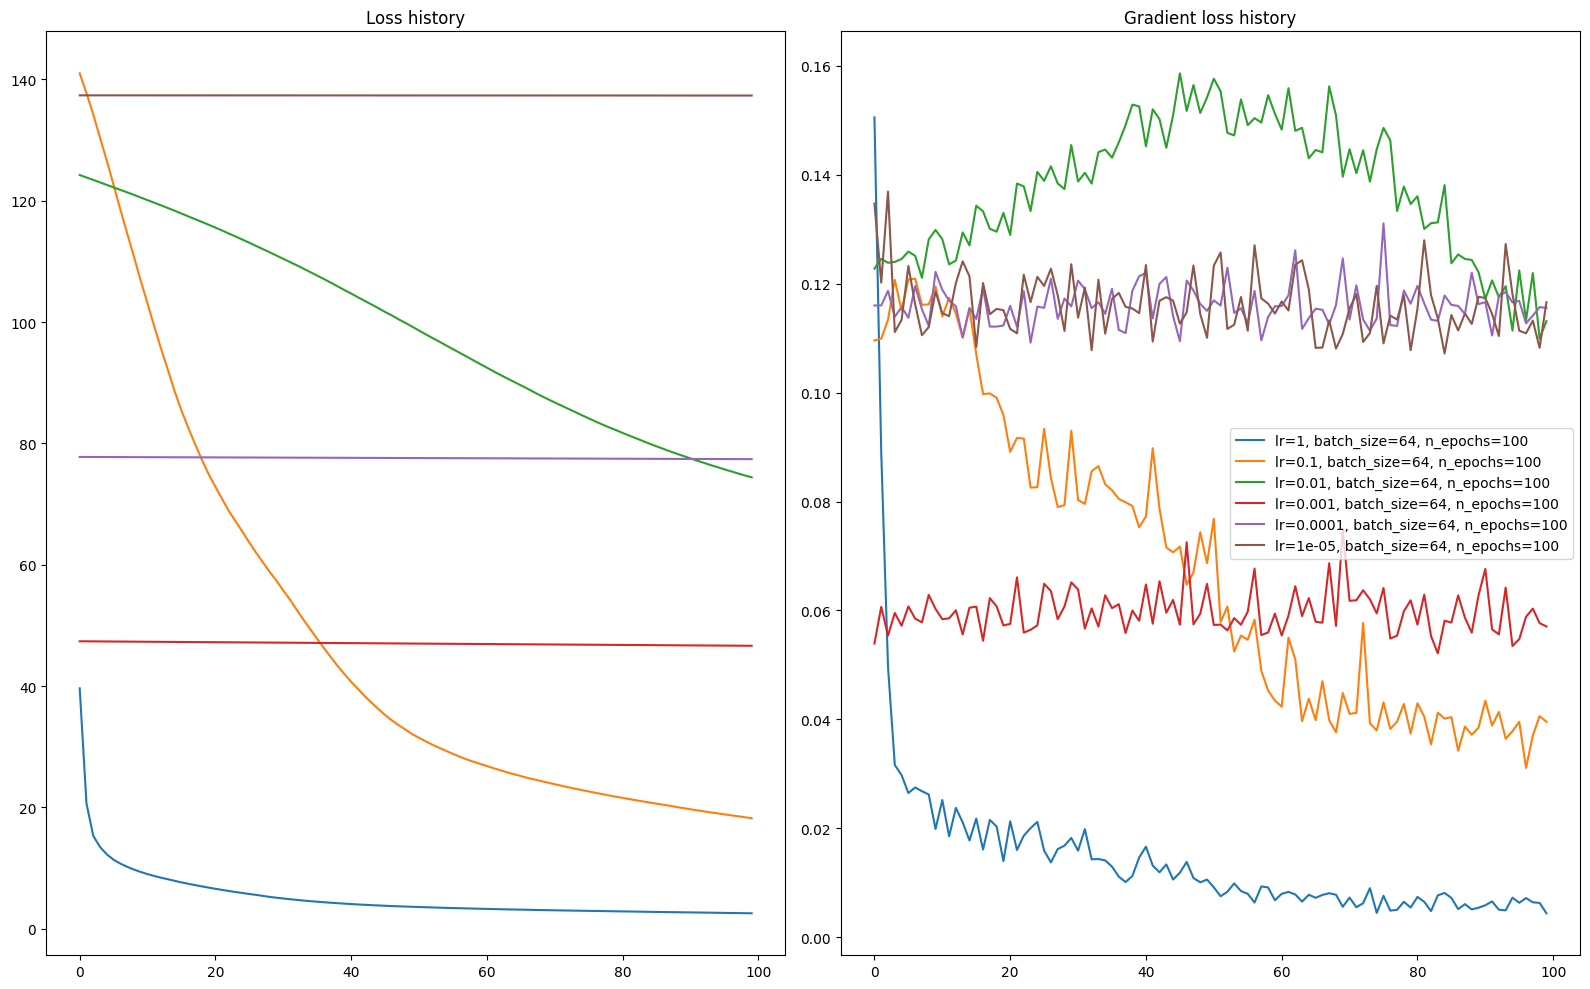

Running optimization for lr=1, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.1, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.7397260273972602
Running optimization for lr=0.01, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.4794520547945205
Running optimization for lr=0.001, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.6575342465753424
Running optimization for lr=0.0001, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.0821917808219178
Running optimization for lr=1e-05, batch_size=128, n_epochs=100 ... done ✅, accuracy = 0.684931506849315


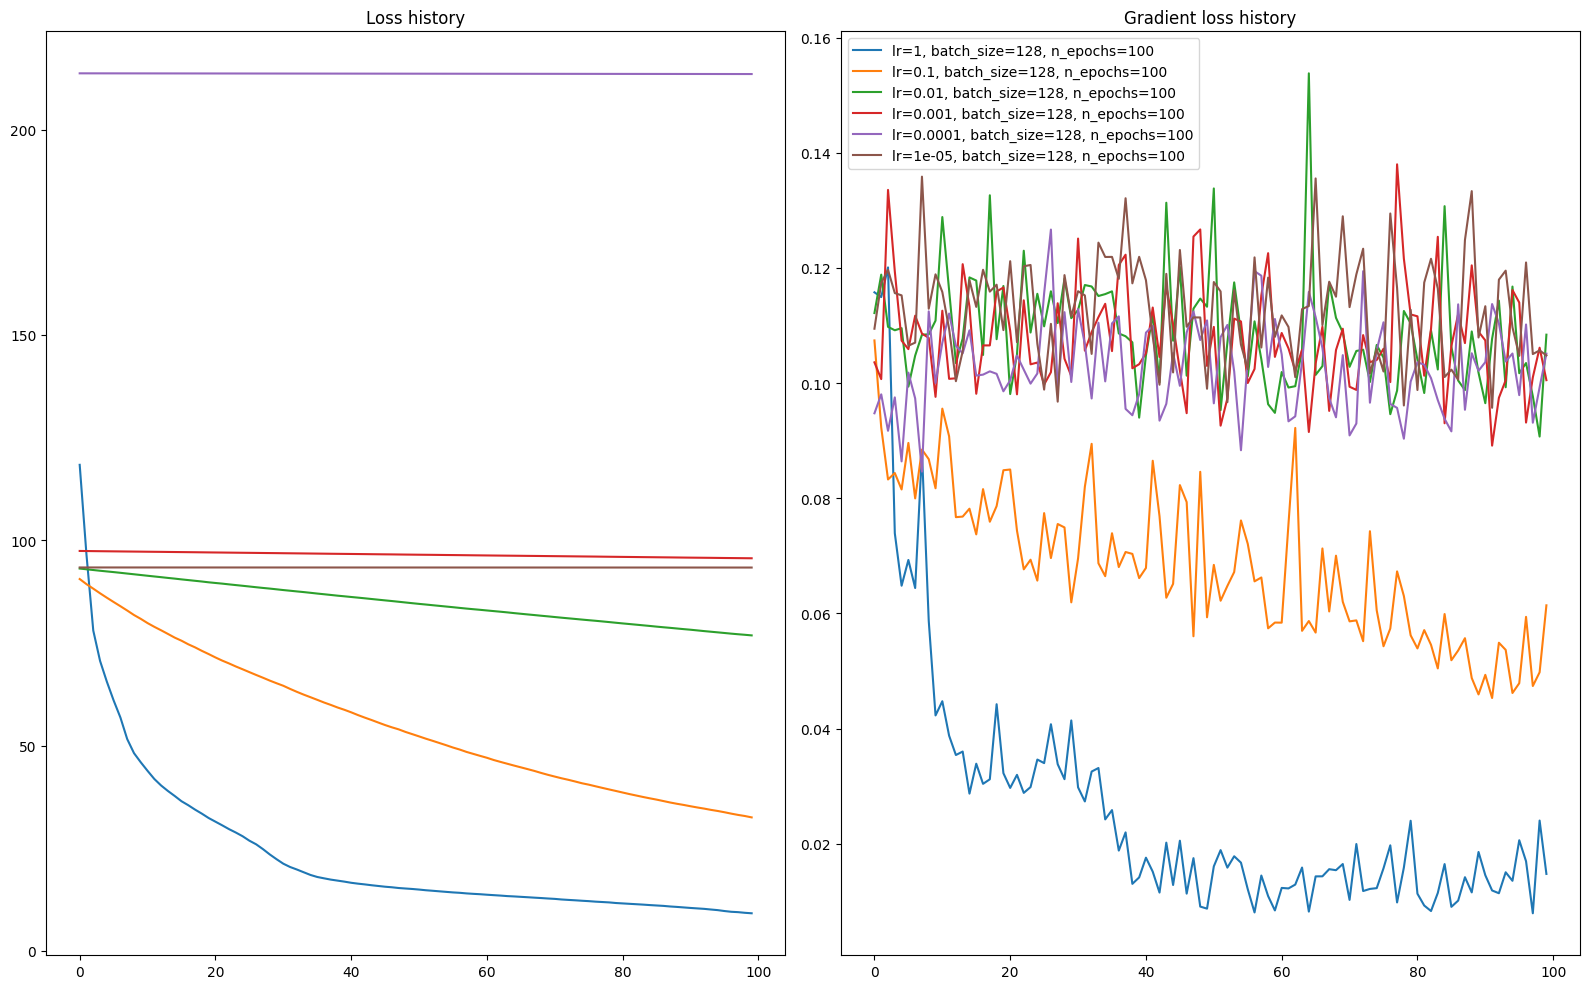

Running optimization for lr=1, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.01, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.9041095890410958
Running optimization for lr=0.001, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.1917808219178082
Running optimization for lr=0.0001, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.2054794520547945
Running optimization for lr=1e-05, batch_size=16, n_epochs=1000 ... done ✅, accuracy = 0.2876712328767123


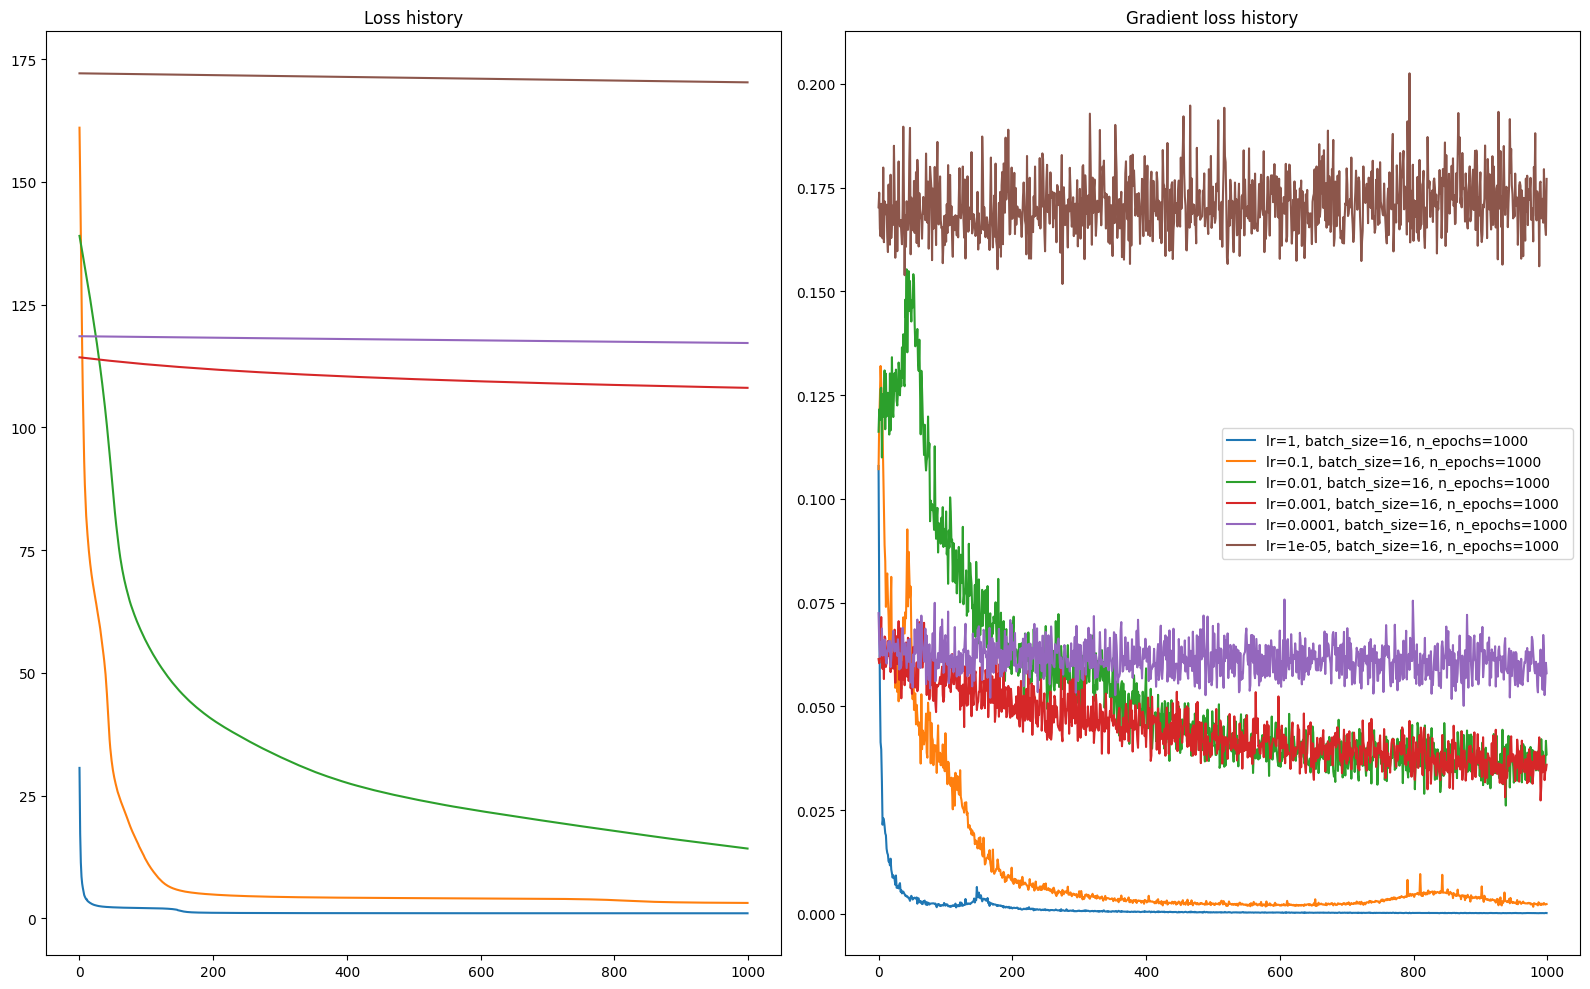

Running optimization for lr=1, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.1, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.958904109589041
Running optimization for lr=0.01, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.8356164383561644
Running optimization for lr=0.001, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.1917808219178082
Running optimization for lr=0.0001, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.7945205479452054
Running optimization for lr=1e-05, batch_size=32, n_epochs=1000 ... done ✅, accuracy = 0.547945205479452


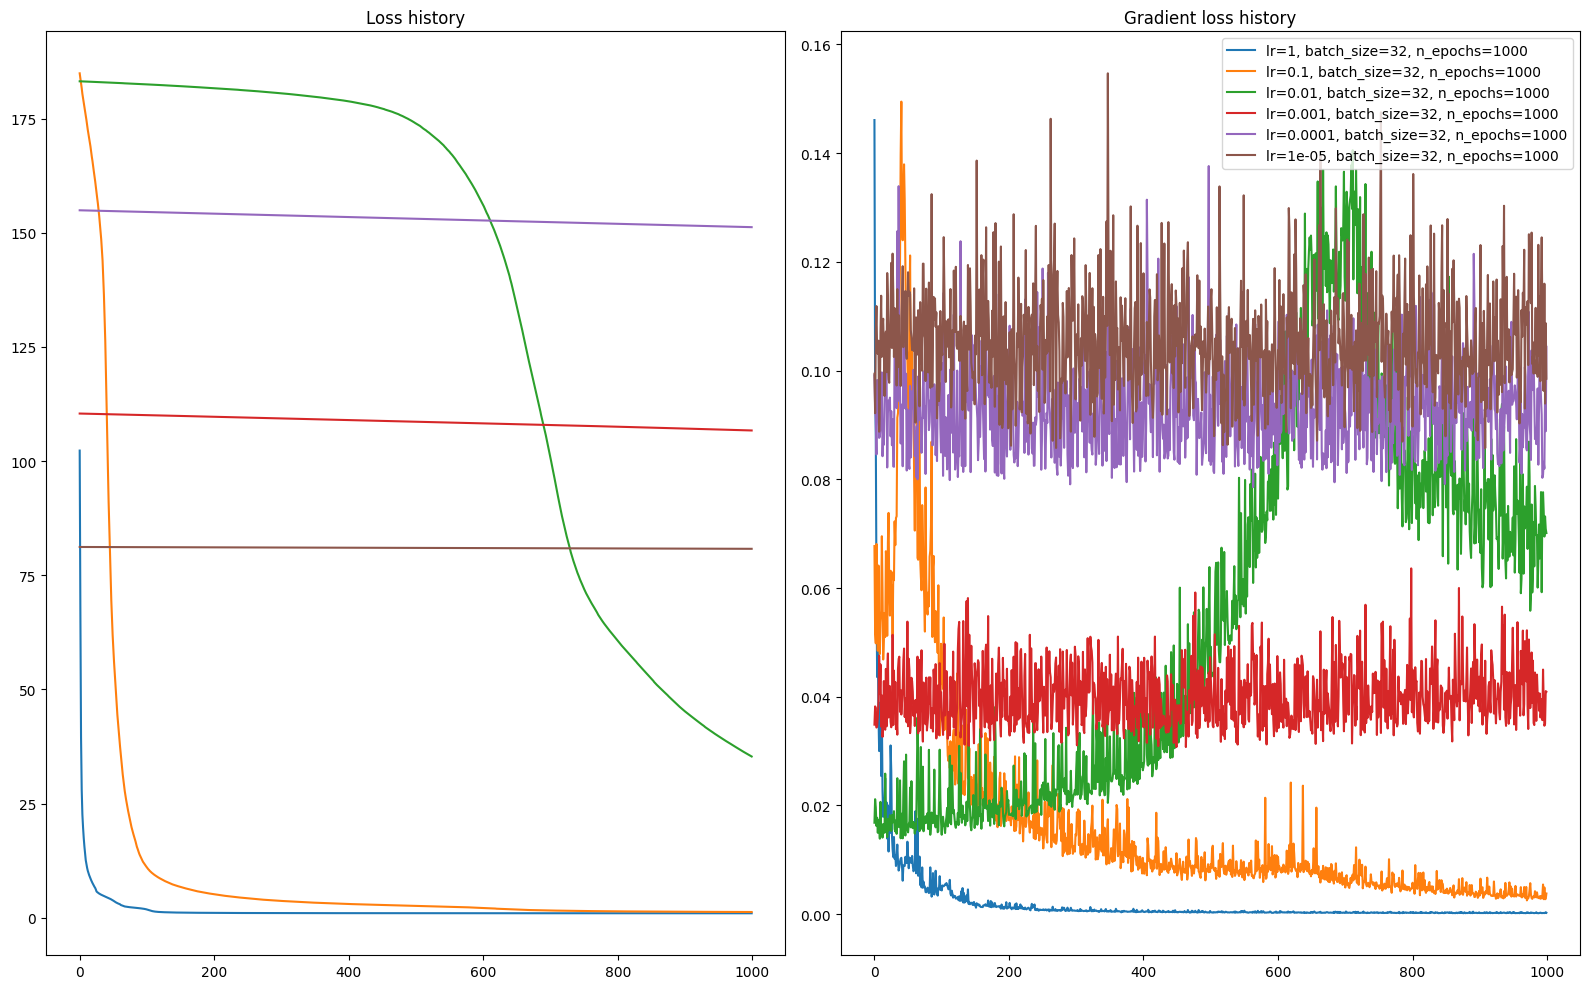

Running optimization for lr=1, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.01, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 0.2328767123287671
Running optimization for lr=0.001, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 0.5342465753424658
Running optimization for lr=0.0001, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 0.7945205479452054
Running optimization for lr=1e-05, batch_size=64, n_epochs=1000 ... done ✅, accuracy = 0.6027397260273972


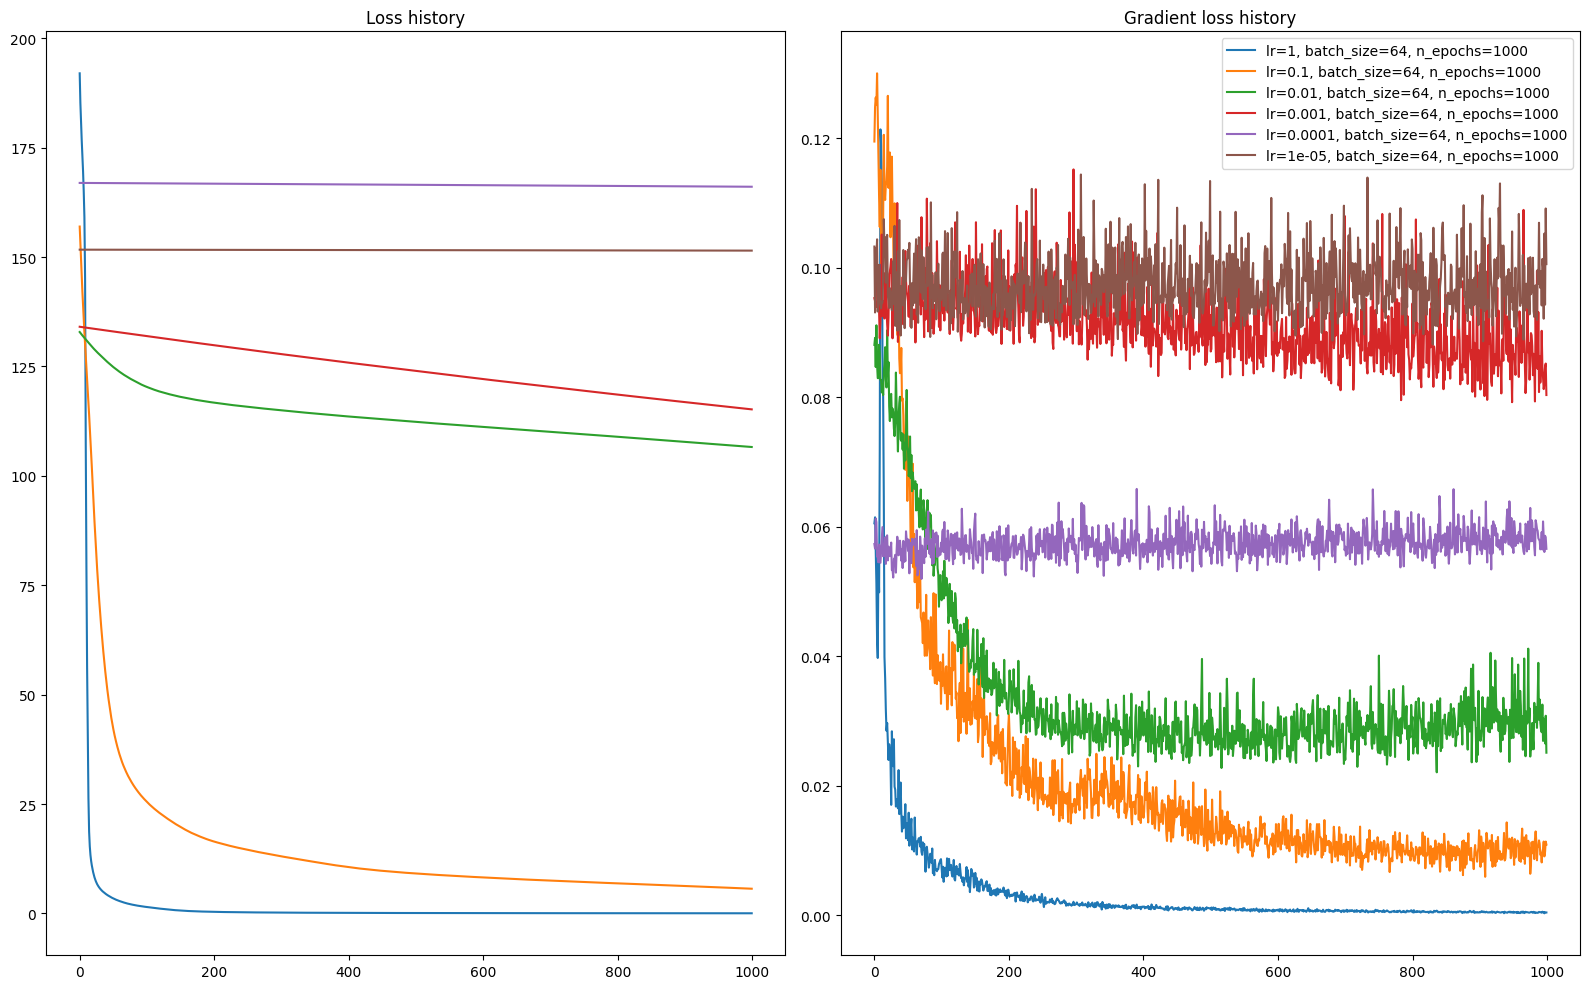

Running optimization for lr=1, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.01, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 0.8082191780821918
Running optimization for lr=0.001, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 0.2602739726027397
Running optimization for lr=0.0001, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 0.4657534246575342
Running optimization for lr=1e-05, batch_size=128, n_epochs=1000 ... done ✅, accuracy = 0.5205479452054794


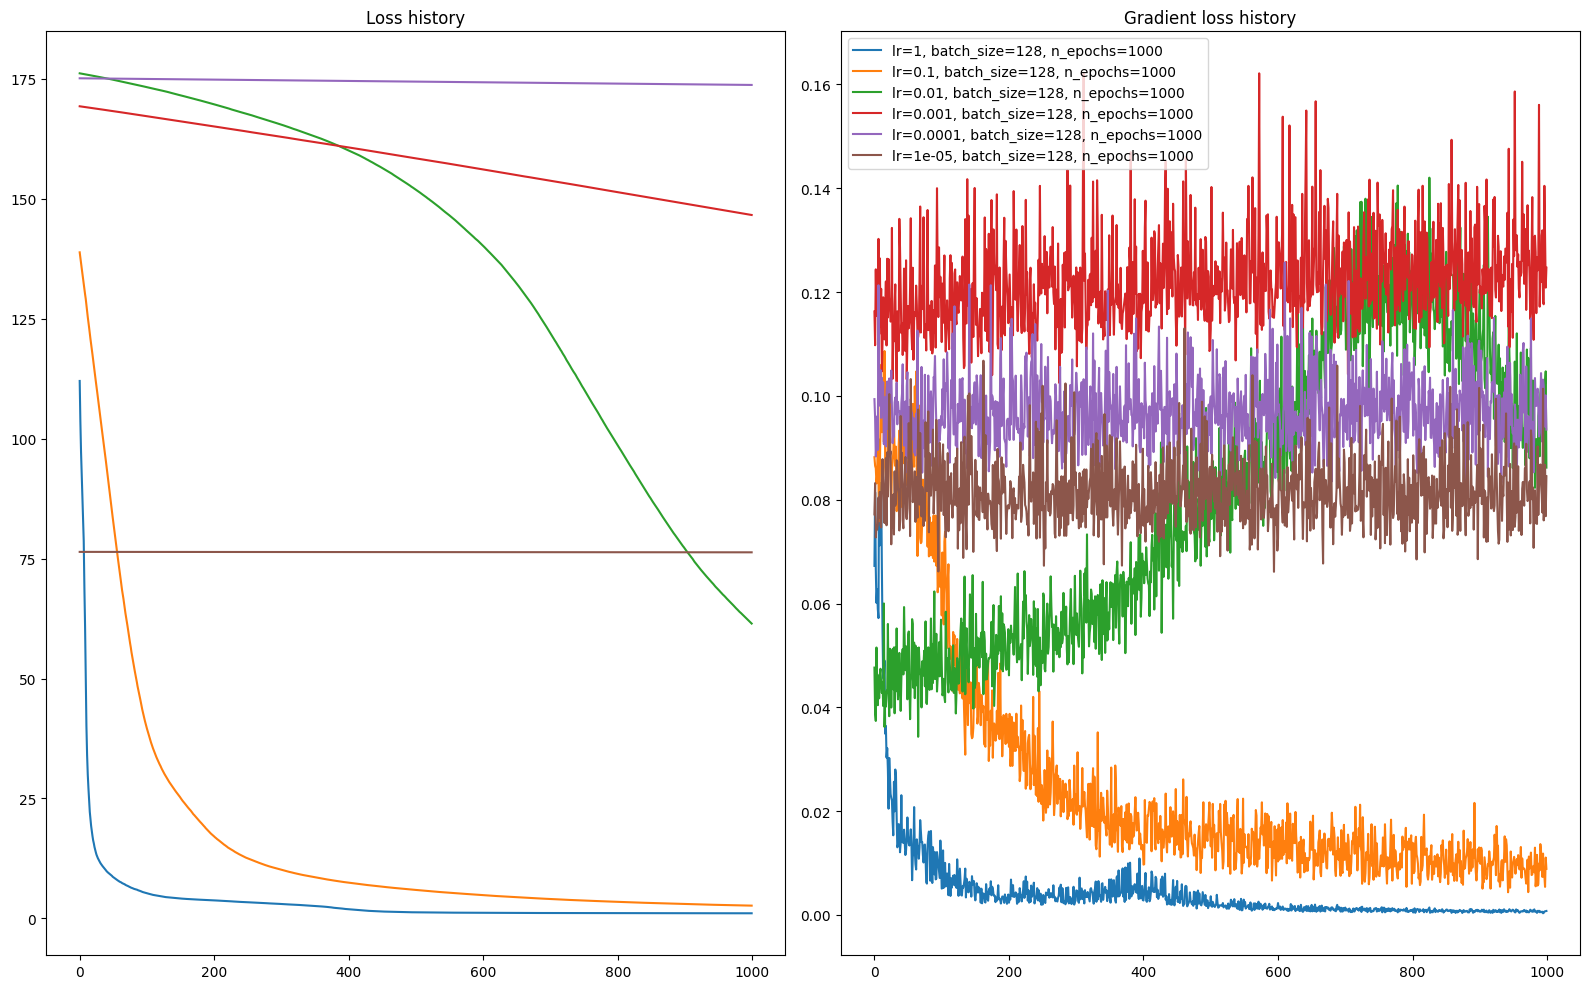

Running optimization for lr=1, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.01, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 0.958904109589041
Running optimization for lr=0.001, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 0.9726027397260274
Running optimization for lr=0.0001, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 0.8767123287671232
Running optimization for lr=1e-05, batch_size=16, n_epochs=10000 ... done ✅, accuracy = 0.3561643835616438


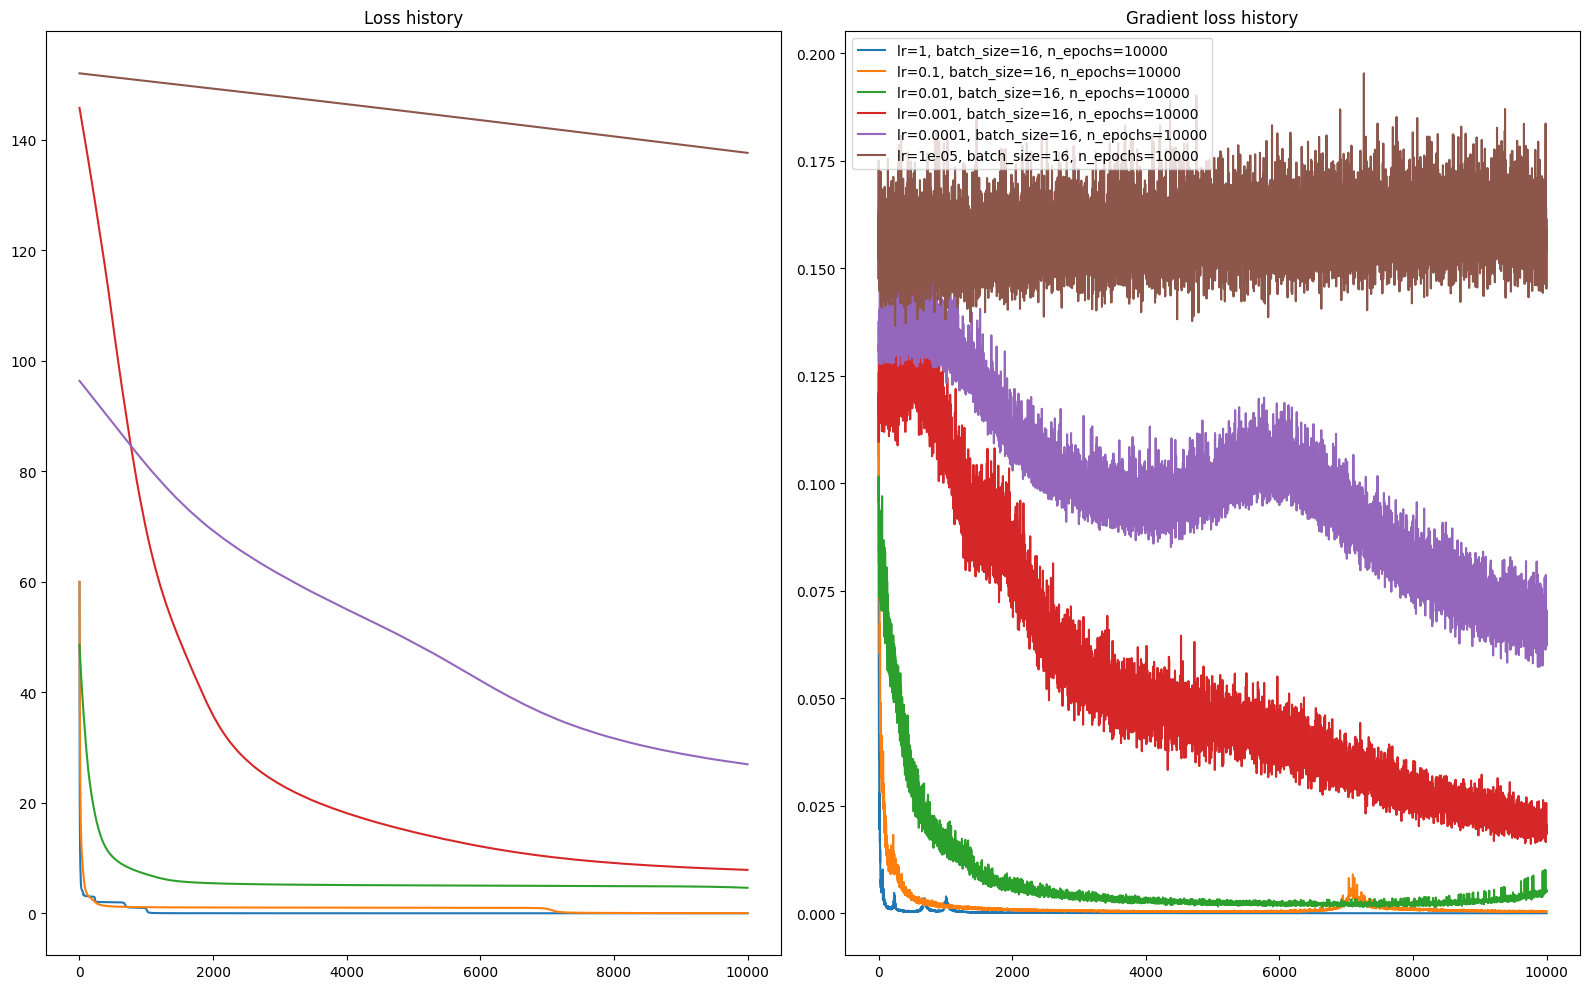

Running optimization for lr=1, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 0.9726027397260274
Running optimization for lr=0.01, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 0.9863013698630136
Running optimization for lr=0.001, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 0.9178082191780822
Running optimization for lr=0.0001, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 0.7671232876712328
Running optimization for lr=1e-05, batch_size=32, n_epochs=10000 ... done ✅, accuracy = 0.1780821917808219


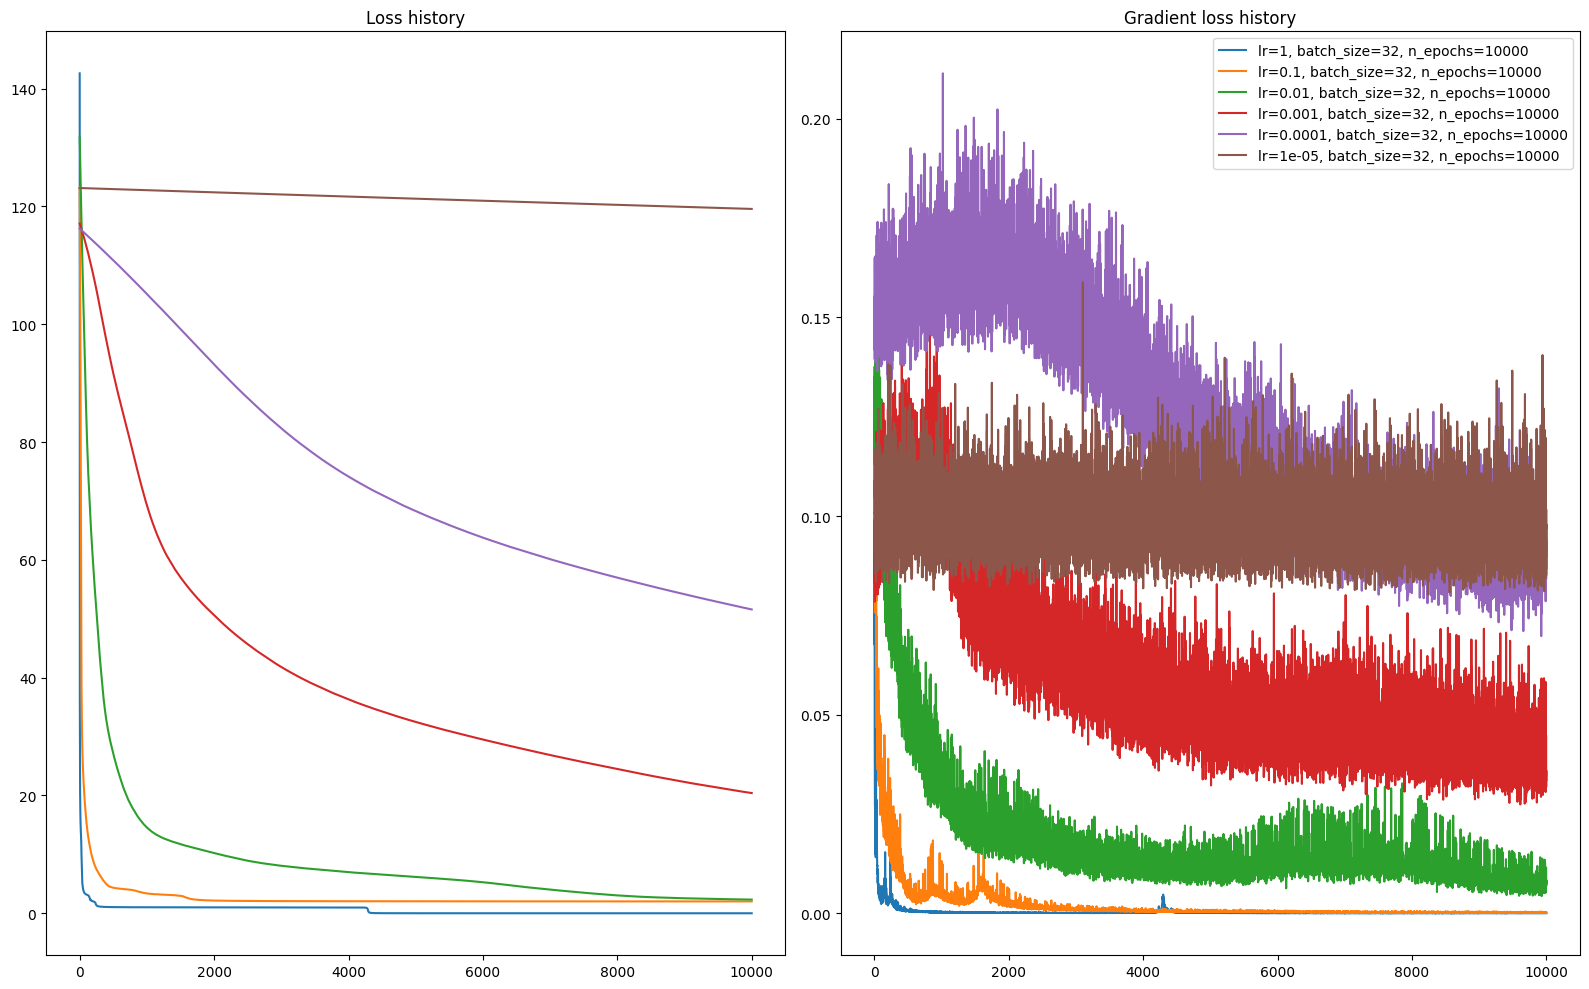

Running optimization for lr=1, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.01, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 0.9726027397260274
Running optimization for lr=0.001, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 0.8767123287671232
Running optimization for lr=0.0001, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 0.410958904109589
Running optimization for lr=1e-05, batch_size=64, n_epochs=10000 ... done ✅, accuracy = 0.7945205479452054


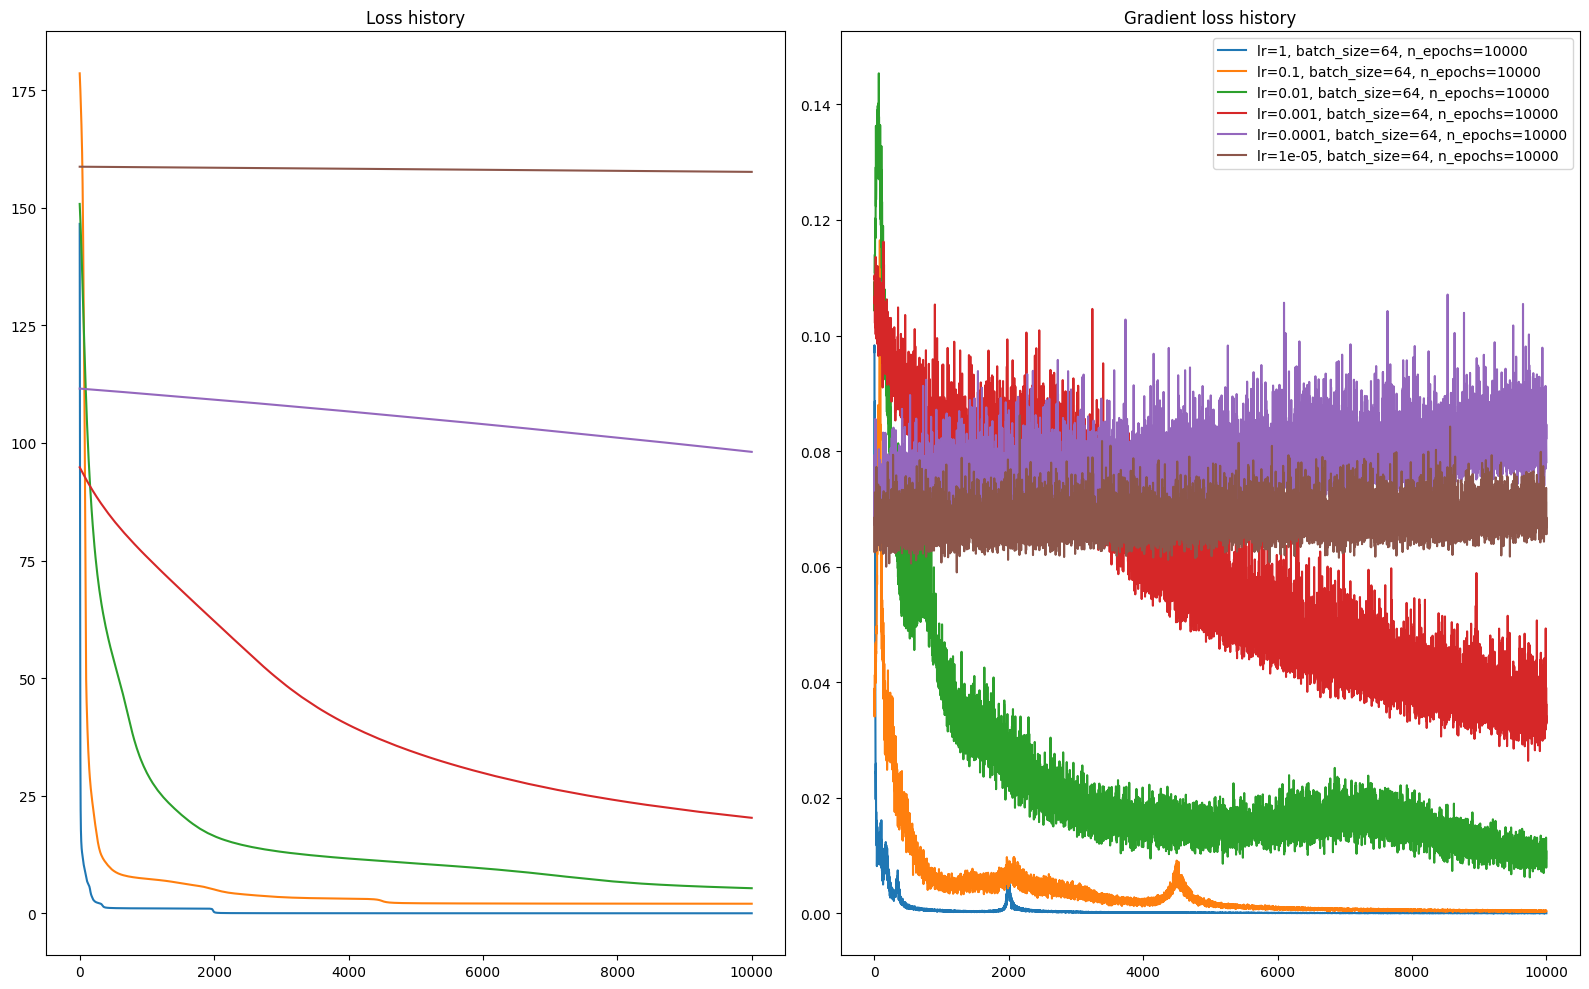

Running optimization for lr=1, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 1.0
Running optimization for lr=0.1, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 0.9726027397260274
Running optimization for lr=0.01, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 0.9315068493150684
Running optimization for lr=0.001, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 0.6575342465753424
Running optimization for lr=0.0001, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 0.7671232876712328
Running optimization for lr=1e-05, batch_size=128, n_epochs=10000 ... done ✅, accuracy = 0.8767123287671232


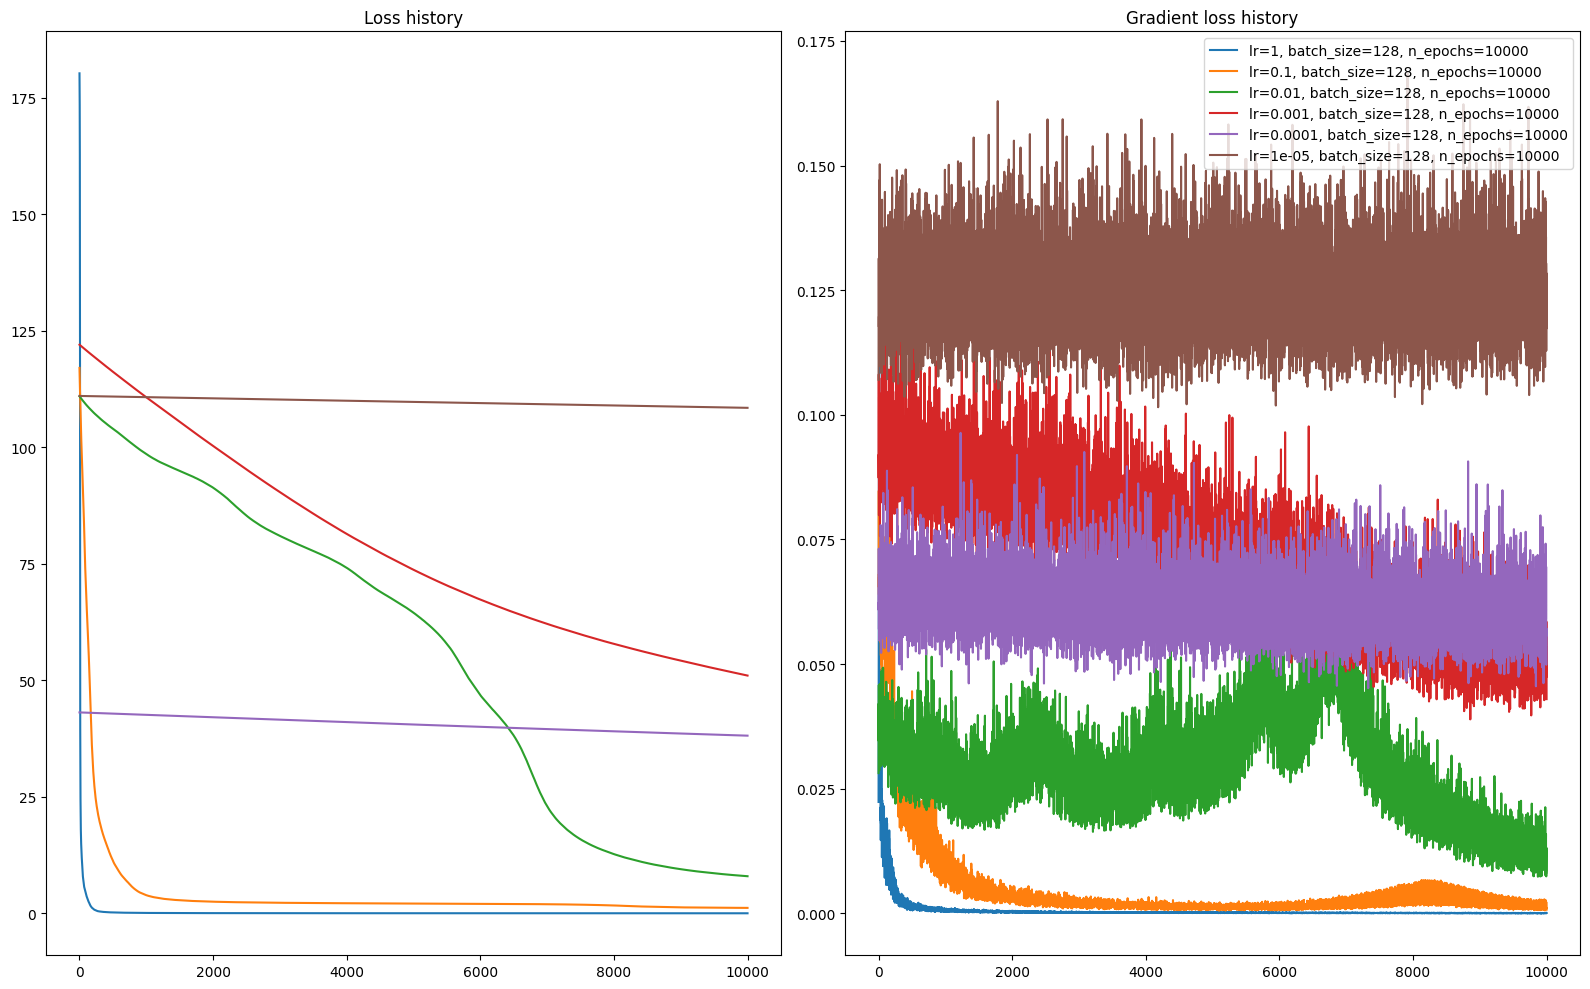

In [41]:
# ================================================================
# ==================== WARN: HIGH RUN TIME =======================
# ================================================================

lr_arr = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
batch_size_arr = [16, 32, 64, 128]
n_epochs_arr = [100, 1000, 10000]

loss_histories = []
grad_loss_histories = []
labels = []

for n_epochs in n_epochs_arr:
    for batch_size in batch_size_arr:
        for lr in lr_arr:
            print(f"Running optimization for lr={lr}, batch_size={batch_size}, n_epochs={n_epochs} ...", end="")
            loss_hist, grad_loss_hist, accuracy = run(TRAIN_RATIO, lr=lr, batch_size=batch_size, n_epochs=n_epochs)

            loss_histories.append(loss_hist)
            grad_loss_histories.append(grad_loss_hist)
            labels.append(f"lr={lr}, batch_size={batch_size}, n_epochs={n_epochs}")
            print(f" done ✅, accuracy = {accuracy}")
        plot_losses(loss_histories, grad_loss_histories, labels)
        loss_histories = []
        grad_loss_histories = []
        labels = []
